In [274]:
import polars as po
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from scipy.stats import skew, kurtosis
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.subplots as sp
from plotnine import ggplot, aes, geom_histogram, theme_bw, labs

In [2]:
df = pd.read_csv('mynta_page(all_page).csv', na_values=[''], keep_default_na=False)

df[['Selling Price', 'Price']] = df[['Selling Price', 'Price']].apply(pd.to_numeric, errors='coerce')
df[['Selling Price', 'Price']] = df[['Selling Price', 'Price']].fillna(0).astype(int)

df['Discount'] = df['Discount'].astype(str)

In [3]:
df.dtypes

Brand            object
Title            object
Selling Price     int32
Price             int32
Discount         object
dtype: object

In [4]:
#pd.set_option("display.max_rows", None)

In [5]:
df.head(50)

,Brand,Title,Selling Price,Price,Discount
0,HRX by Hrithik Roshan,Printed Round Neck T-Shirt,664,699,5%
1,HERE&NOW,Solid Polo T-shirt,399,799,50%
2,Moda Rapido,Colourblocked Round Neck T-shirt,454,699,35%
3,Roadster,Camouflage Round Neck T-shirt,454,699,35%
4,DILLINGER,Colourblocked Round Neck Navy Blue T-shirt,449,899,50%
5,FIDO DIDO,Solid Polo Collar T-shirt,637,1449,56%
6,Nautica,Striped Polo Collar T-shirt,1649,3299,50%
7,H&M,Round-Neck T-shirt Regular Fit,399,399,0%
8,Roadster,All-Over-Printed T-shirt,384,699,45%
9,HERE&NOW,Men Printed Round Neck T-shirt,411,749,45%


# UNIVARIATE ANALYSIS 
1. working with Qualitative/categorical data 

In [6]:
#a. Frequency distribution table 
df['Brand'].value_counts()

Puma            4000
H&M             3424
Jack & Jones    2657
Roadster        2551
WROGN           1449
                ... 
SG LEMAN           1
UMM                1
test2              1
JAINISH            1
Minions            1
Name: Brand, Length: 496, dtype: int64

In [230]:
df['Selling Price'].max()

13000.0

In [229]:
df['Price'].max()

15000.0

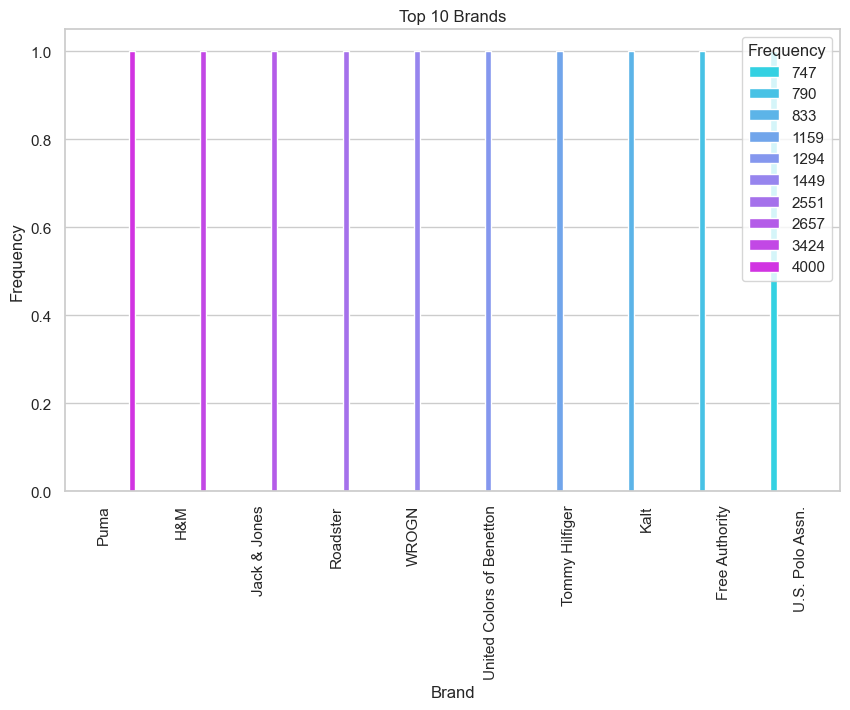

In [7]:
top_10_brands = df['Brand'].value_counts().head(10).reset_index()
top_10_brands.columns = ['Brand', 'Frequency']
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=top_10_brands, x='Brand', hue='Frequency', palette='cool')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Top 10 Brands')
plt.xticks(rotation=90)
plt.show()

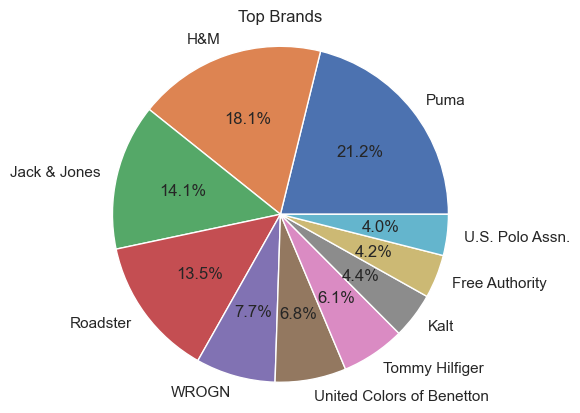

In [8]:
top_10_brand = df['Brand'].value_counts().nlargest(10)
top_10_brand.plot(kind='pie', autopct="%0.1f%%")
plt.axis('equal')  
plt.title('Top Brands')  
plt.ylabel('')  
plt.show()

In [13]:
a=top_10_brand
b=((a/a.sum())*100).values
c=[]
cf=0
for i in b:
    cf=cf+i
    c.append(cf)
print(c)

[21.159542953872197, 39.272111722386796, 53.327338129496404, 66.8218366483284, 74.4868810833686, 81.33199322894626, 87.46297079983073, 91.86944561997461, 96.04845535336437, 100.0]


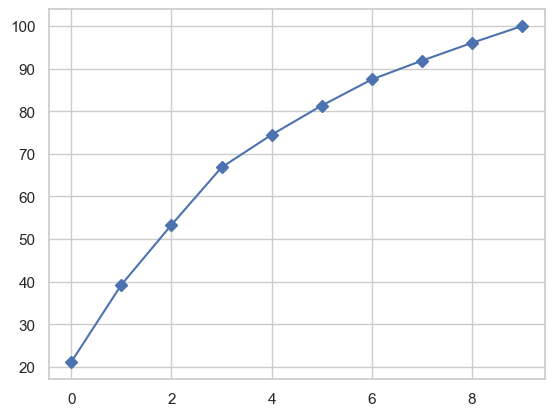

In [14]:
plt.plot(c, marker='D')

(array([3., 2., 1., 0., 0., 2., 0., 0., 1., 1.]),
 array([ 747. , 1072.3, 1397.6, 1722.9, 2048.2, 2373.5, 2698.8, 3024.1,
        3349.4, 3674.7, 4000. ]),
 <BarContainer object of 10 artists>)

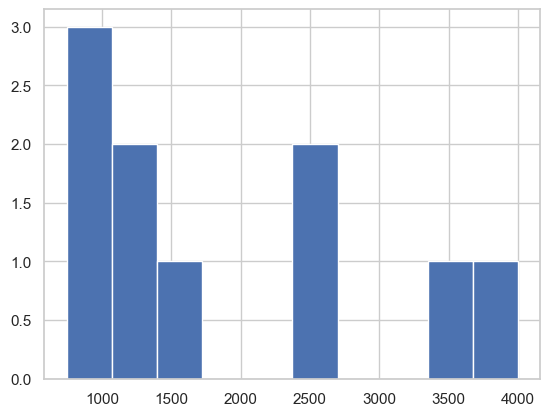

In [16]:
#Histograms 
a.values
plt.hist(top_10_brand)

In [71]:
top_100_brand = df['Brand'].value_counts().nlargest(100).index
top_100_Price = df['Price'].value_counts().nlargest(100).index
a=top_100_brand
b=top_100_Price

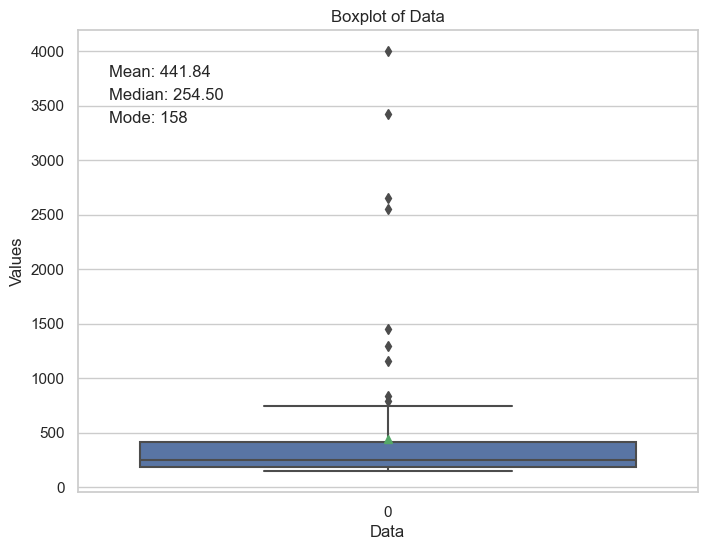

In [18]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=a, showfliers=True, showmeans=True)
plt.xlabel("Data")
plt.ylabel("Values")
plt.title("Boxplot of Data")
mean_value = np.mean(a)
median_value = np.median(a)
mode_value = np.argmax(np.bincount(a))
plt.text(0.05, 0.9, f"Mean: {mean_value:.2f}", 
         transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f"Median: {median_value:.2f}", 
         transform=plt.gca().transAxes)
plt.text(0.05, 0.8, f"Mode: {mode_value}", transform=plt.gca().transAxes)
plt.show()

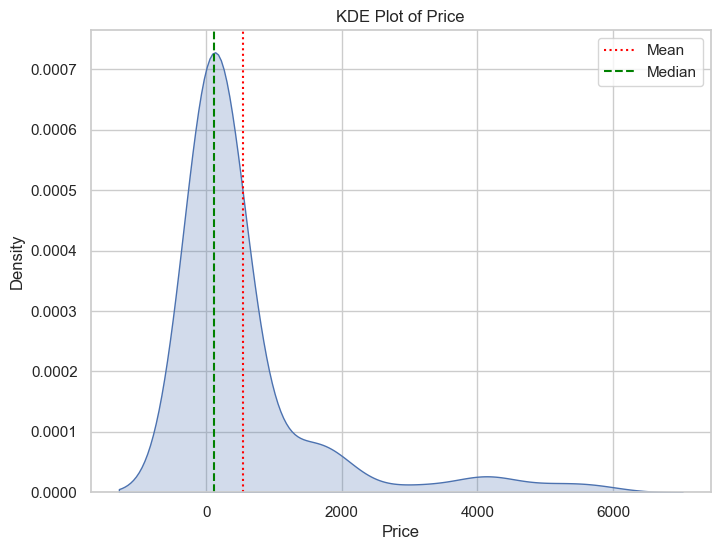

In [19]:
#kdeplot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=top_100_Price, fill=True)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("KDE Plot of Price")
plt.axvline(np.mean(top_100_Price), color='red', linestyle=':', 
            label='Mean')
plt.axvline(np.median(top_100_Price), color='green', linestyle='--', 
            label='Median')
plt.legend()
plt.show()

# Bivarite Analysis

# categorical vs numerical 

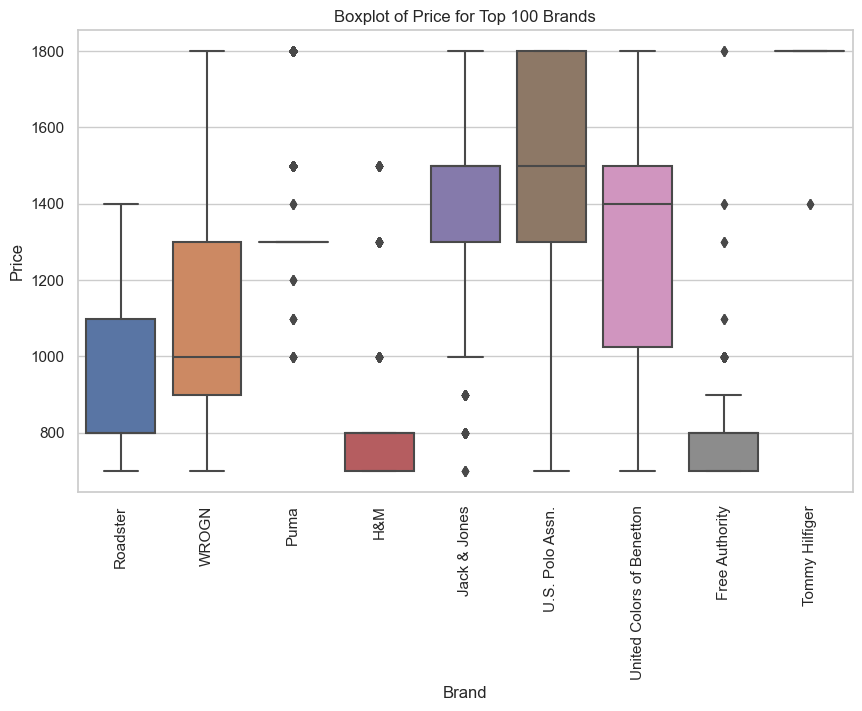

In [20]:
#boxplot
top_10_brand = df['Brand'].value_counts().nlargest(10).index
top_10_Price = df['Price'].value_counts().nlargest(10).index
filtered_df = df[df['Brand'].isin(top_10_brand) & 
                 df['Price'].isin(top_10_Price)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=filtered_df)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Boxplot of Price for Top 100 Brands')
plt.xticks(rotation=90)
plt.show()

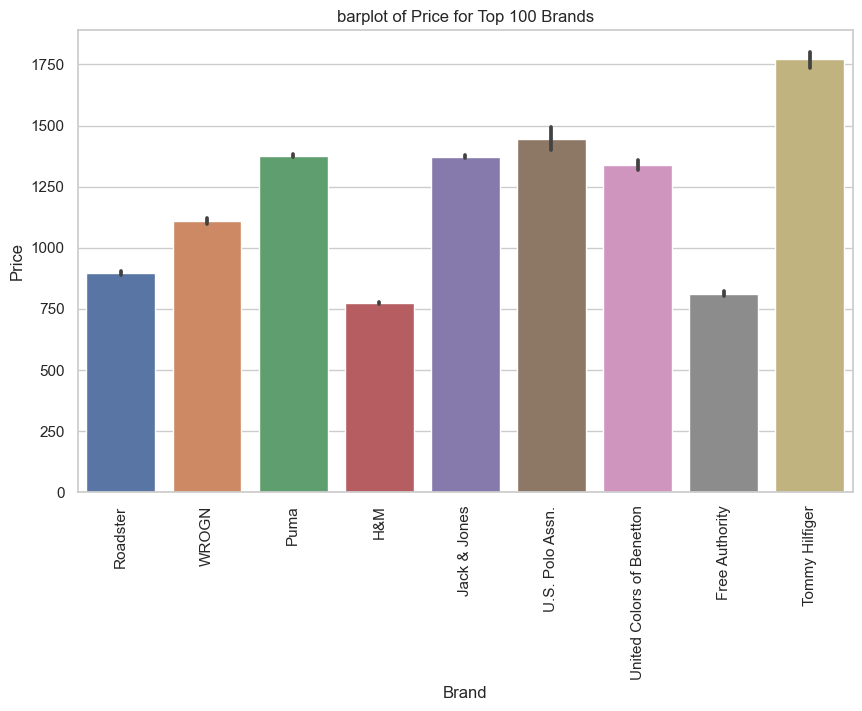

In [21]:
#barplot 
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Price', data=filtered_df,errorbar=('ci', 95))
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('barplot of Price for Top 100 Brands')
plt.xticks(rotation=90)
plt.show()

# Numerical vs Numerical 

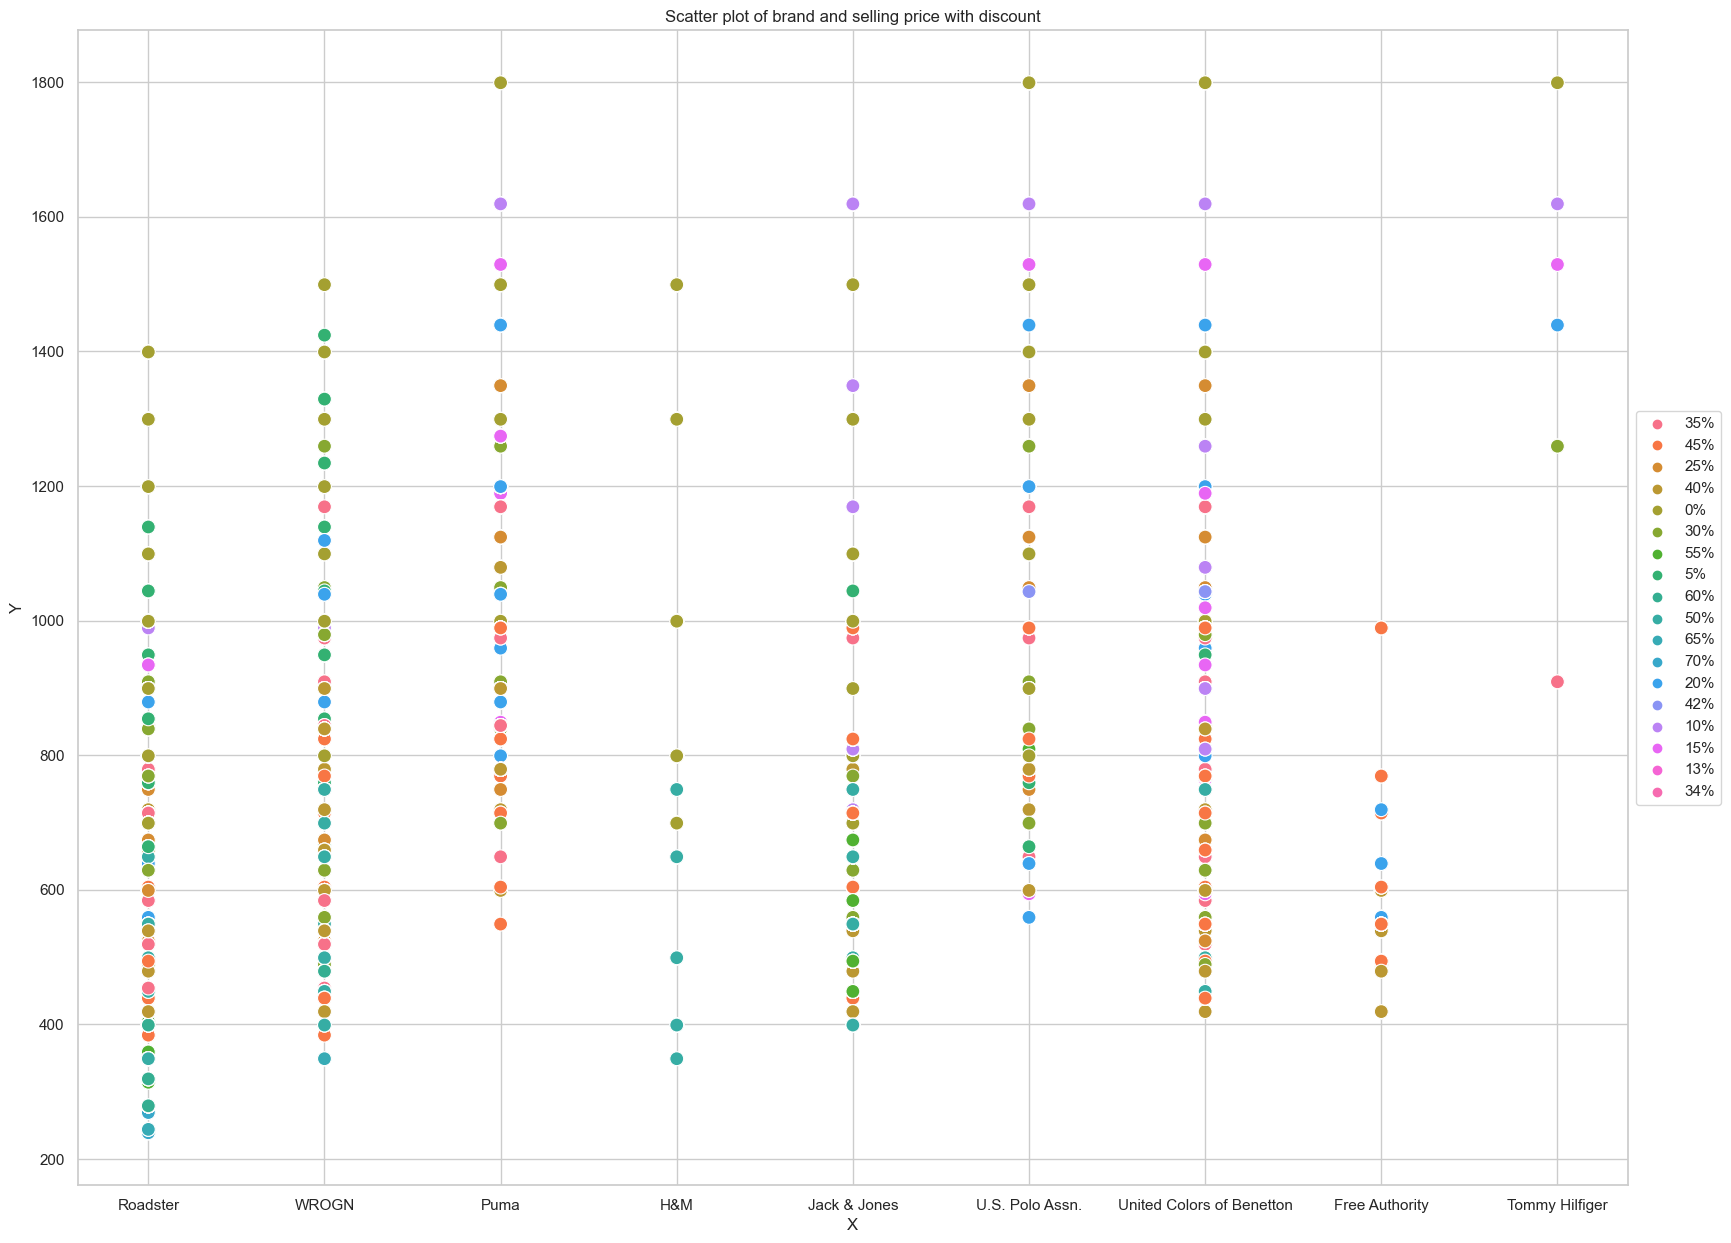

In [55]:
#scatter plot 
def update_scatter_plot():
    plt.figure(figsize=(20, 15))
    scatter = sns.scatterplot(x='Brand', y='Selling Price', hue='Discount', data=filtered_df, s=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of brand and selling price with discount')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    plt.show()
update_scatter_plot()

# Categorical vs Categorical 


In [59]:
#cross table/contingency table
ct=pd.crosstab(filtered_df['Brand'],filtered_df['Discount'])

<Axes: xlabel='Discount', ylabel='Brand'>

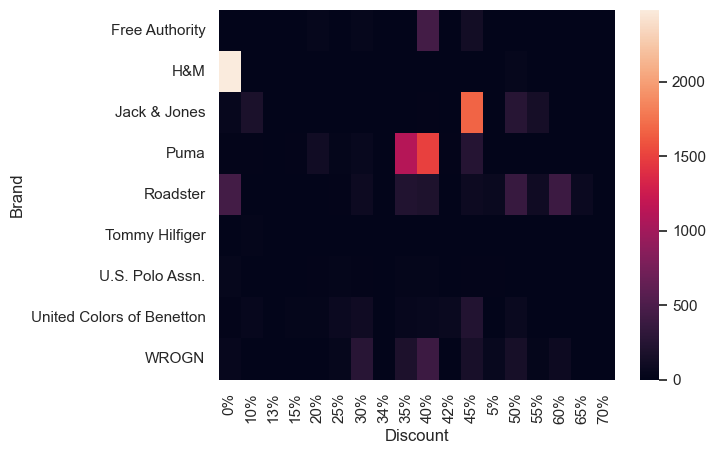

In [60]:
#heatmaps 
sns.heatmap(ct)

# measure of Central Tendency

In [89]:
mean_discount = np.mean(df['Discount'])
print("Mean Discount:", mean_discount)

Mean Discount: 0.35769341637010676


In [91]:
mean_price = df['Price'].mean()
print("Mean Price:", mean_price)

Mean Price: 1366.90243772242


In [93]:
mean_selling_price = df['Selling Price'].mean()
print("Mean Selling Price:", mean_selling_price)

Mean Selling Price: 925.6620640569395


# The probelm of Outliers

In [95]:
#Median outliers not work here 
median_discount = np.median(df['Discount'])
print("Median Discount:", median_discount)

Median Discount: 0.35


In [96]:
median_price = np.median(df['Price'])
print("Median price:", median_price)

Median price: 1199.0


In [359]:
median_Selling_price = np.median(df['Selling Price'])
print("Median Selling Price price:", median_Selling_price)

Median Selling Price price: 764.0


In [100]:
#Mode
print(stats.mode(df['Discount']))
print(stats.mode(df['Selling Price']))
print(stats.mode(df['Price']))

ModeResult(mode=array([0.]), count=array([9504]))
ModeResult(mode=array([699.]), count=array([2331]))
ModeResult(mode=array([1299.]), count=array([5707]))


# Measure of Spread
#Range 
#interquartile range
#Variance
#Standard Deviation


In [116]:
#Range
numerical_columns = ['Selling Price', 'Price', 'Discount']
ranges = {}
for column in numerical_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    column_range = max_value - min_value
    ranges[column] = column_range
for column, column_range in ranges.items():
    if column == 'Discount':
        print(f"Range of {column}: {column_range} (Values are in percentage)")
    else:
        print(f"Range of {column}: {column_range}")
    print()

Range of Selling Price: 13000.0

Range of Price: 15000.0

Range of Discount: 23.0 (Values are in percentage)



In [109]:
#Percentile 
numerical_columns = ['Selling Price', 'Price', 'Discount']
for column in numerical_columns:
    column_percentiles = np.percentile(df[column], [25, 50, 75, 90])
    print(f"Percentiles for {column}:")
    print("25th percentile:", column_percentiles[0])
    print("50th percentile (median):", column_percentiles[1])
    print("75th percentile:", column_percentiles[2])
    print("90th percentile:", column_percentiles[3])
    if column == 'Discount':
        print("(Values are in percentage)")
    print()
 

Percentiles for Selling Price:
25th percentile: 526.0
50th percentile (median): 764.0
75th percentile: 1017.25
90th percentile: 1599.0


Percentiles for Price:
25th percentile: 849.0
50th percentile (median): 1199.0
75th percentile: 1599.0
90th percentile: 2100.0


Percentiles for Discount:
25th percentile: 0.15
50th percentile (median): 0.35
75th percentile: 0.5
90th percentile: 0.6
(Values are in percentage)




In [108]:
#Quartiles 
numerical_columns = ['Selling Price', 'Price', 'Discount']
for column in numerical_columns:
    column_quartiles = np.quantile(df[column], [0.25, 0.50, 0.75, 0.90])
    print(f"Quartiles for {column}:")
    print("25th Quartiles:", column_quartiles[0])
    print("50th Quartiles (median):", column_quartiles[1])
    print("75th Quartiles:", column_quartiles[2])
    print("90th Quartiles:", column_quartiles[3])
    if column == 'Discount':
        print("(Values are in percentage)")
    print()

Quartiles for Selling Price:
25th Quartiles: 526.0
50th Quartiles (median): 764.0
75th Quartiles: 1017.25
90th Quartiles: 1599.0

Quartiles for Price:
25th Quartiles: 849.0
50th Quartiles (median): 1199.0
75th Quartiles: 1599.0
90th Quartiles: 2100.0

Quartiles for Discount:
25th Quartiles: 0.15
50th Quartiles (median): 0.35
75th Quartiles: 0.5
90th Quartiles: 0.6
(Values are in percentage)



In [123]:
#Mean Absolute Deviation 
numerical_columns = ['Selling Price', 'Price', 'Discount']
for column in numerical_columns:
    mad = df[column].mad()
    mad = round(mad,2)
    print(f"Mean Absolute Deviation (MAD) for {column}: {mad}")

Mean Absolute Deviation (MAD) for Selling Price: 431.17
Mean Absolute Deviation (MAD) for Price: 552.92
Mean Absolute Deviation (MAD) for Discount: 0.21


In [124]:
#variacne 
numerical_columns = ['Selling Price', 'Price', 'Discount']
for column in numerical_columns:
    variance = df[column].var()
    variance = round(variance,2)
    print(f"Variance for {column}: {variance}")

Variance for Selling Price: 497752.05
Variance for Price: 798899.77
Variance for Discount: 0.4


In [125]:
#standard deviation 
numerical_columns = ['Selling Price', 'Price', 'Discount']
for column in numerical_columns:
    std_dev = df[column].var()
    std_dev = round(std_dev,2)
    print(f"Standard Deviation for {column}: {std_dev}")

Standard Deviation for Selling Price: 497752.05
Standard Deviation for Price: 798899.77
Standard Deviation for Discount: 0.4


In [122]:
#median absolute deviation
numerical_columns = ['Selling Price', 'Price', 'Discount']
for column in numerical_columns:
    mad = np.median(np.abs(df[column]-np.median(df[column])))
    mad= round(mad,2)
    print(f"Median absolute deviation for {column}: {mad}")

Median absolute deviation for Selling Price: 240.0
Median absolute deviation for Price: 400.0
Median absolute deviation for Discount: 0.15


In [129]:
#skewennes 
skewness_selling_price = skew(df['Selling Price'])
skewness_price = skew(df['Price'])
skewness_discount = skew(df['Discount'].astype(float))
print("Skewness of Selling Price:", skewness_selling_price)
print("Skewness of Price:", skewness_price)
print("Skewness of Discount:", skewness_discount)

Skewness of Selling Price: 4.298768265328422
Skewness of Price: 3.9357107764963417
Skewness of Discount: 15.850129757365595


<Axes: ylabel='Density'>

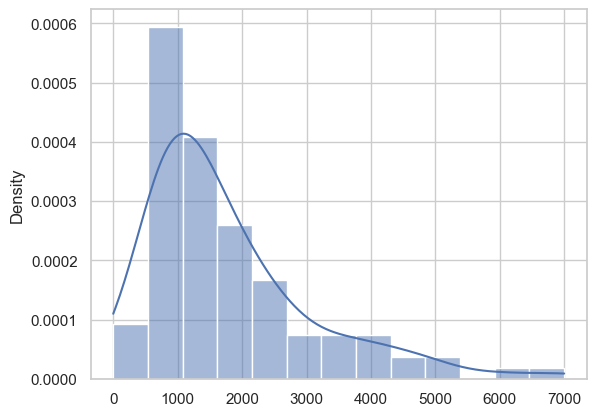

In [138]:
sns.histplot(top_100_Price, kde=True, stat="density")

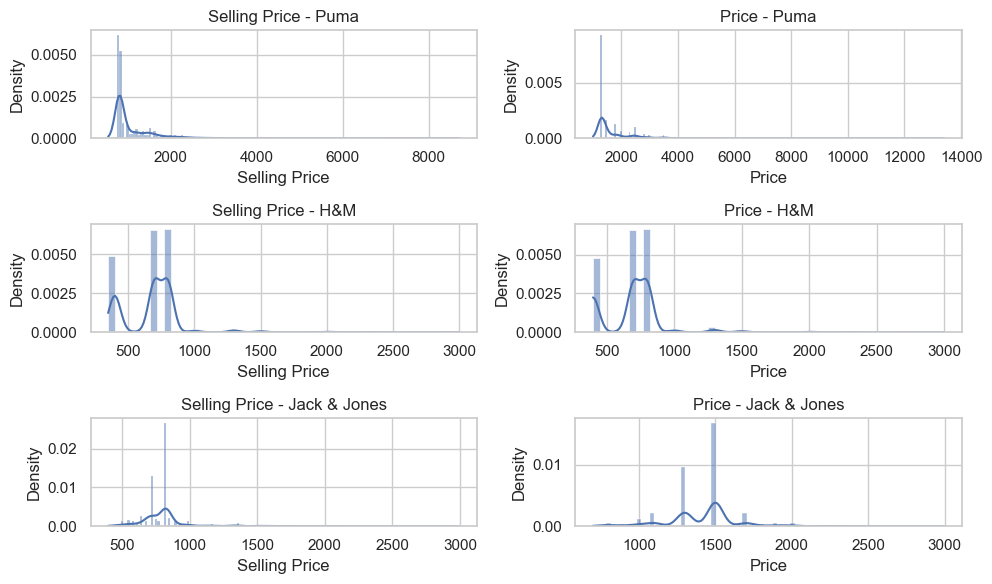

In [145]:
top_3_brands = df['Brand'].value_counts().head(3).index.tolist()
fig, axes = plt.subplots(len(top_3_brands), 2, figsize=(10, 6))
for i, brand in enumerate(top_3_brands):
    filtered_df = df[df['Brand'] == brand]
    sns.histplot(filtered_df['Selling Price'], ax=axes[i, 0], 
                 kde=True, stat="density")
    axes[i, 0].set_title(f'Selling Price - {brand}')
    sns.histplot(filtered_df['Price'], ax=axes[i, 1], 
                 kde=True, stat="density")
    axes[i, 1].set_title(f'Price - {brand}')
plt.tight_layout()
plt.show()

In [187]:
brand_with_highest_discount = df.loc[df['Discount'].idxmax(), 'Brand']

# Calculate the average selling price for each brand
average_price_by_brand = df.groupby('Brand')['Selling Price'].mean()

# Display the brand with the highest discount
print("Brand with the highest discount:", brand_with_highest_discount)

# Display the average selling price for each brand
print("Average selling price by brand:")
for brand, average_price in average_price_by_brand.items():
    print(brand, "-", average_price)

Brand with the highest discount: The North Face
Average selling price by brand:
2GO - 858.0
98 Degree North - 574.5283018867924
ACTIMAXX - 496.3265306122449
ADIDAS - 1705.2902374670184
ADIDAS NEO - 1555.5
ADIDAS Originals - 2279.2688172043013
ALCOTT - 1169.3846153846155
ALTOMODA by Pantaloons - 892.3333333333334
AMERICAN EAGLE OUTFITTERS - 1261.1464968152866
ARISE - 528.6829268292682
ARMISTO - 671.0666666666667
ASICS - 1538.6969696969697
ATTIITUDE - 547.3829787234042
AXMANN - 877.7027027027027
Adamo London - 1075.5384615384614
Admiral - 1229.625
Adobe - 623.479262672811
Aeropostale - 1106.8896396396397
Aesthetic Bodies - 614.1041666666666
Ajile by Pantaloons - 566.3394495412844
Akiva - 976.5
Alcis - 592.6988188976378
Allen Solly - 978.7523809523809
Allen Solly Sport - 734.4047619047619
American Crew - 893.4651162790698
American Eye - 1495.0
American Swan - 1288.1463414634147
Antony Morato - 2381.2814371257487
Arrow - 1098.445945945946
Arrow Blue Jean Co. - 784.8108108108108
Arrow New Y

In [188]:
average_selling_price =  df.groupby('Brand')['Selling Price'].mean()
print(average_selling_price)

Brand
2GO                 858.000000
98 Degree North     574.528302
ACTIMAXX            496.326531
ADIDAS             1705.290237
ADIDAS NEO         1555.500000
                      ...     
s.Oliver           1846.727273
t-base              780.000000
test2               999.000000
wesquare            313.454545
zebu                489.615385
Name: Selling Price, Length: 496, dtype: float64


In [192]:
most_sold_cloth = df['Title'].value_counts().index[0]
print("The most sold cloth is:",most_sold_cloth)

The most sold cloth is: Printed Round Neck T-shirt


In [200]:
tshirt_types = df[df['Title'].str.contains('t-shirt', case=False)]['Title'].value_counts().head(20)

print("Top 20 types of t-shirts that are sold:")
for i, (tshirt_type, count) in enumerate(tshirt_types.items()):
    print(f"{i+1}. {tshirt_type} - {count} t-shirts")

Top 20 types of t-shirts that are sold:
1. Printed Round Neck T-shirt - 9717 t-shirts
2. Solid Polo Collar T-shirt - 4869 t-shirts
3. Solid Round Neck T-shirt - 3117 t-shirts
4. Striped Polo Collar T-shirt - 2819 t-shirts
5. Printed Polo Collar T-shirt - 1959 t-shirts
6. Striped Round Neck T-shirt - 1746 t-shirts
7. Printed Slim Fit T-shirt - 1450 t-shirts
8. Long T-shirt - 1164 t-shirts
9. Printed Logo Split T-shirt - 1124 t-shirts
10. Solid Slub Jersey T-shirt - 1124 t-shirts
11. Colourblocked Round Neck T-shirt - 1029 t-shirts
12. Colourblocked Polo Collar T-shirt - 936 t-shirts
13. Solid ESS Jersey Polo T-shirt - 933 t-shirts
14. Men Printed Round Neck T-shirt - 898 t-shirts
15. Round-Neck T-shirt Regular Fit - 849 t-shirts
16. Printed T-shirt - 715 t-shirts
17. Solid Henley Neck T-shirt - 708 t-shirts
18. Solid V-Neck T-shirt - 480 t-shirts
19. Men Solid Polo Collar T-shirt - 467 t-shirts
20. Men Solid Round Neck T-shirt - 352 t-shirts


# cummulative density function

In [240]:
# CDF
selling_price_cdf_values = np.cumsum(selling_price_cdf[0]) / np.sum(selling_price_cdf[0])
price_cdf_values = np.cumsum(price_cdf[0]) / np.sum(price_cdf[0])

# PDF
selling_price_pdf_values = selling_price_cdf[0] / np.sum(selling_price_cdf[0])
price_pdf_values = price_cdf[0] / np.sum(price_cdf[0])
selling_price_threshold = 0.1 * np.max(selling_price_pdf_values)
price_threshold = 0.1 * np.max(price_pdf_values)

print("Selling price threshold:", selling_price_threshold)
print("Price Threshold:", price_threshold)
print("CDF values for Selling Price:")
print(selling_price_cdf_values)
print("CDF values for Price:")
print(price_cdf_values)
print("PDF values for Selling Price:")
print(selling_price_pdf_values)
print("PDF values for Price:")
print(price_pdf_values)

Selling price threshold: 0.0841405693950178
Price Threshold: 0.07393950177935942
CDF values for Selling Price:
[0.84140569 0.96736655 0.99158363 0.99718861 0.99855872 0.99900356
 0.99953737 0.99969751 0.99992883 1.        ]
CDF values for Price:
[0.73939502 0.96336299 0.98697509 0.99537367 0.99733096 0.99875445
 0.99912811 0.99982206 0.99996441 1.        ]
PDF values for Selling Price:
[8.41405694e-01 1.25960854e-01 2.42170819e-02 5.60498221e-03
 1.37010676e-03 4.44839858e-04 5.33807829e-04 1.60142349e-04
 2.31316726e-04 7.11743772e-05]
PDF values for Price:
[7.39395018e-01 2.23967972e-01 2.36120996e-02 8.39857651e-03
 1.95729537e-03 1.42348754e-03 3.73665480e-04 6.93950178e-04
 1.42348754e-04 3.55871886e-05]


In [209]:
selling_price_bins = selling_price_cdf[1]
price_bins = price_cdf[1]
selling_price_threshold_index = np.argmax(price_cdf_values>price_threshold)
selling_price_actual_threshold = selling_price_bins[selling_price_threshold_index+1]
price_actual_threshold = price_bins[price_threshold_index+1]
print("Acutal numerical value for Selling Price theshold:",selling_price_actual_threshold)
print("ACtual numerical Value ofr price threshold:",price_actual_threshold)

Acutal numerical value for Selling Price theshold: 1300.0
ACtual numerical Value ofr price threshold: 1500.0


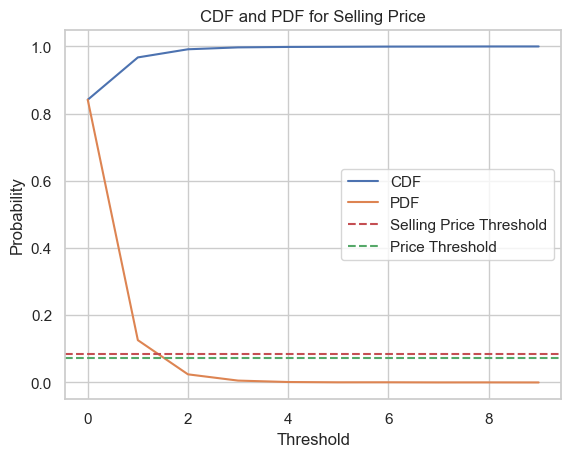

In [215]:
plt.plot(selling_price_cdf_values, label='CDF')
plt.plot(selling_price_pdf_values, label='PDF')

plt.axhline(y=selling_price_threshold, color='r', linestyle='--', label='Selling Price Threshold')
plt.axhline(y=price_threshold, color='g', linestyle='--', label='Price Threshold')

plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('CDF and PDF for Selling Price')
plt.legend()

plt.show()

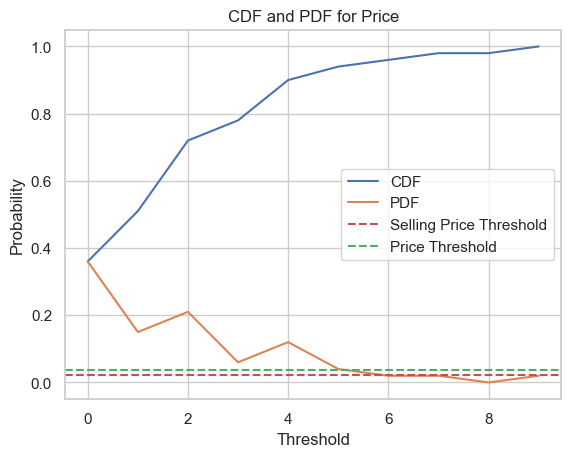

In [220]:
plt.plot(price_cdf_values, label='CDF')
plt.plot(price_pdf_values, label='PDF')

plt.axhline(y=selling_price_threshold, color='r', linestyle='--', label='Selling Price Threshold')
plt.axhline(y=price_threshold, color='g', linestyle='--', label='Price Threshold')

plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('CDF and PDF for Price')
plt.legend()

plt.show()

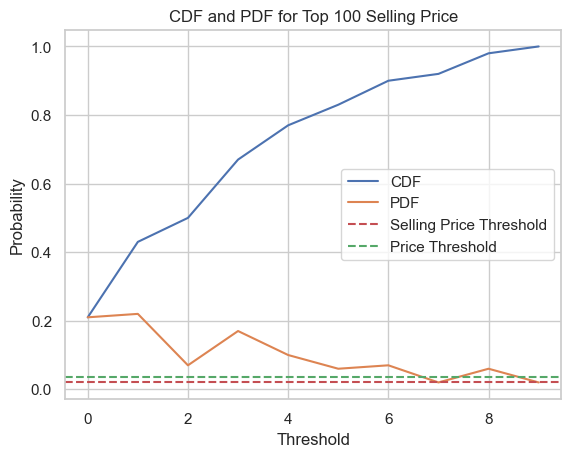

In [216]:
top_100_selling_prices = df['Selling Price'].nlargest(100)
top_100_prices = df['Price'].nlargest(100)
selling_price_cdf = np.histogram(top_100_selling_prices, bins=10, density=True)
price_cdf = np.histogram(top_100_prices, bins=10, density=True)
# CDF
selling_price_cdf_values = np.cumsum(selling_price_cdf[0]) / np.sum(selling_price_cdf[0])
price_cdf_values = np.cumsum(price_cdf[0]) / np.sum(price_cdf[0])
# PDF
selling_price_pdf_values = selling_price_cdf[0] / np.sum(selling_price_cdf[0])
price_pdf_values = price_cdf[0] / np.sum(price_cdf[0])
selling_price_threshold = 0.1 * np.max(selling_price_pdf_values)
price_threshold = 0.1 * np.max(price_pdf_values)
x = np.arange(1, len(selling_price_cdf_values) + 1)
y = np.arange(1, len(selling_price_pdf_values) + 1)
X, Y = np.meshgrid(x, y)
Z_CDF = np.outer(selling_price_cdf_values, np.ones_like(selling_price_pdf_values))
Z_PDF = np.outer(selling_price_pdf_values, np.ones_like(selling_price_cdf_values))
fig = go.Figure(data=[
    go.Surface(x=X, y=Y, z=Z_CDF, name='CDF', showscale=False),
    go.Surface(x=X, y=Y, z=Z_PDF, name='PDF', showscale=False),
])

fig.add_trace(go.Scatter3d(
    x=[1, 10],
    y=[1, 10],
    z=[selling_price_threshold, selling_price_threshold],
    mode='lines',
    name='Selling Price Threshold',
    line=dict(color='red', dash='dash'),
))

fig.add_trace(go.Scatter3d(
    x=[1, 10],
    y=[1, 10],
    z=[price_threshold, price_threshold],
    mode='lines',
    name='Price Threshold',
    line=dict(color='green', dash='dash'),
))
fig.update_layout(
    scene=dict(
        xaxis_title='Threshold',
        yaxis_title='Threshold',
        zaxis_title='Probability',
    ),
    title='CDF and PDF for Top 100 Selling Price',
    legend=dict(x=0, y=1),
)

fig.show()


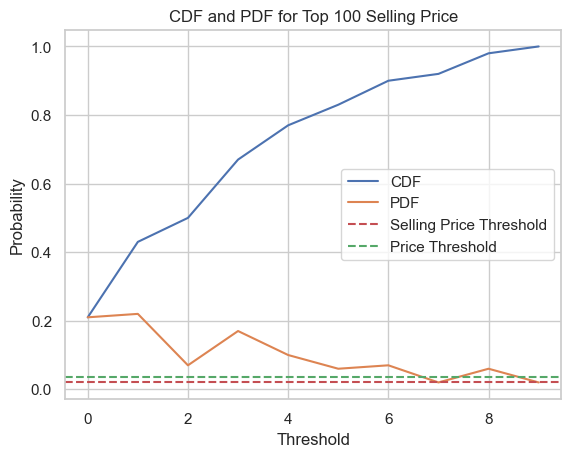

In [223]:
top_100_selling_prices = df['Selling Price'].nlargest(100)
top_100_prices = df['Price'].nlargest(100)
selling_price_cdf = np.histogram(top_100_selling_prices, bins=10, density=True)
price_cdf = np.histogram(top_100_prices, bins=10, density=True)
# CDF
selling_price_cdf_values = np.cumsum(selling_price_cdf[0]) / np.sum(selling_price_cdf[0])
price_cdf_values = np.cumsum(price_cdf[0]) / np.sum(price_cdf[0])
# PDF
selling_price_pdf_values = selling_price_cdf[0] / np.sum(selling_price_cdf[0])
price_pdf_values = price_cdf[0] / np.sum(price_cdf[0])
selling_price_threshold = 0.1 * np.max(selling_price_pdf_values)
price_threshold = 0.1 * np.max(price_pdf_values)
plt.plot(selling_price_cdf_values, label='CDF')
plt.plot(selling_price_pdf_values, label='PDF')
plt.axhline(y=selling_price_threshold, color='r', linestyle='--', label='Selling Price Threshold')
plt.axhline(y=price_threshold, color='g', linestyle='--', label='Price Threshold')
plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('CDF and PDF for Top 100 Selling Price')
plt.legend()

plt.show()

In [231]:
threshold_levels = [2, 4, 6, 8]
selling_price_thresholds = [threshold * 13000.0 for threshold in threshold_levels]
price_thresholds = [threshold * 15000.0 for threshold in threshold_levels]

print("Threshold values for Selling Price:")
print(selling_price_thresholds)
print("Threshold values for Price:")
print(price_thresholds)

Threshold values for Selling Price:
[26000.0, 52000.0, 78000.0, 104000.0]
Threshold values for Price:
[30000.0, 60000.0, 90000.0, 120000.0]


# Normal Distribuiton

In [259]:
selling_price_mean = df['Selling Price'].mean()
selling_price_std = df['Selling Price'].std()

In [260]:
x_selling_price = np.linspace(df['Selling Price'].min(), df['Selling Price'].max(), 100)
x_price = np.linspace(df['Price'].min(), df['Price'].max(), 100)

In [261]:
y_selling_price = (1 / (selling_price_std * np.sqrt(2 * np.pi))) * np.exp(-(x_selling_price - selling_price_mean)**2 /
                                                                          (2 * selling_price_std**2))

y_price = (1 / (price_std * np.sqrt(2 * np.pi))) * np.exp(-(x_price - price_mean)**2 / (2 * price_std**2))

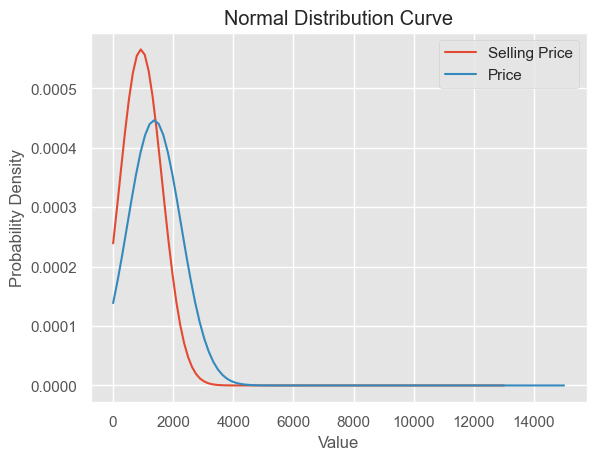

In [262]:
#Right Skewed data
plt.plot(x_selling_price, y_selling_price, label='Selling Price')
plt.plot(x_price, y_price, label='Price')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Curve')

plt.legend()
plt.show()

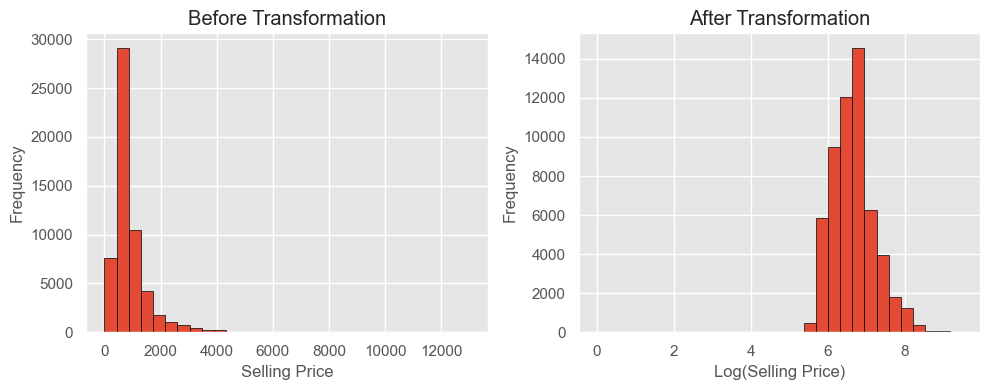

In [266]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df['Selling Price'], bins=30, edgecolor='black')
ax1.set_title('Before Transformation')
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Frequency')
log_transformed_data = np.log1p(df['Selling Price'])
ax2.hist(log_transformed_data, bins=30, edgecolor='black')
ax2.set_title('After Transformation')
ax2.set_xlabel('Log(Selling Price)')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

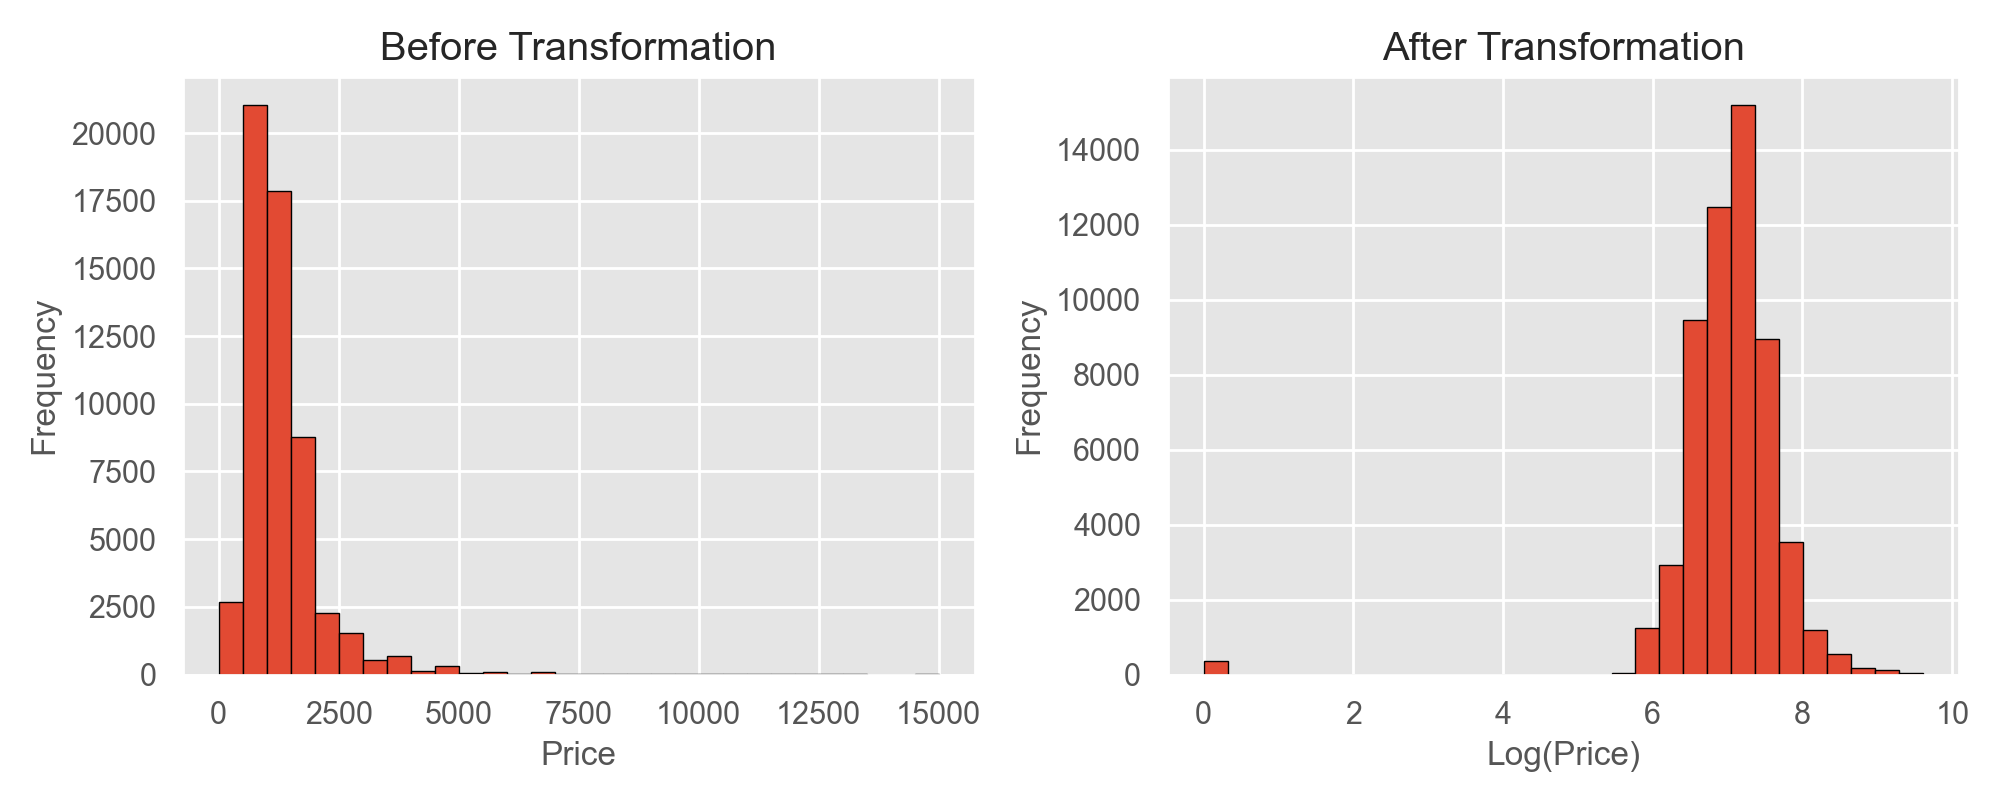

In [294]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df['Price'], bins=30, edgecolor='black')
ax1.set_title('Before Transformation')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
log_transformed_data_1 = np.log1p(df['Price'])
ax2.hist(log_transformed_data_1, bins=30, edgecolor='black')
ax2.set_title('After Transformation')
ax2.set_xlabel('Log(Price)')
ax2.set_ylabel('Frequency')
plt.tight_layout() 
plt.show()

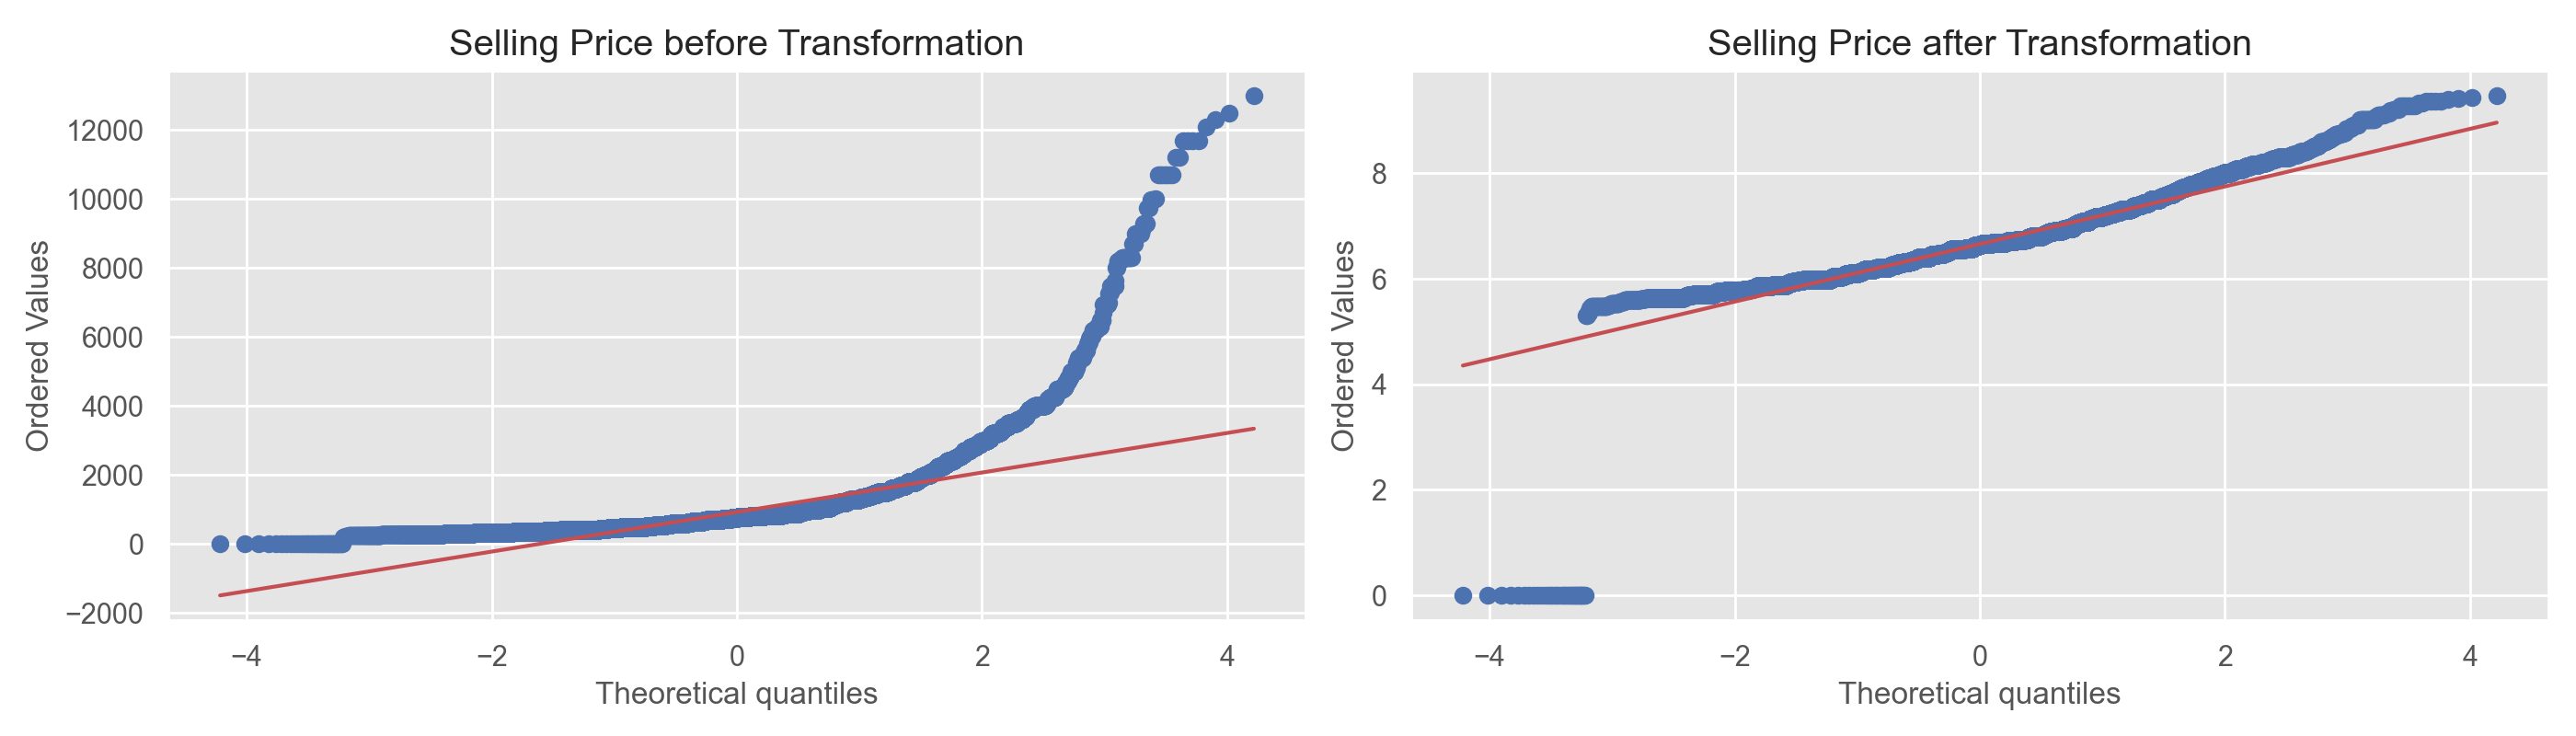

In [290]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(df['Selling Price'], dist='norm', plot=plt)
plt.title('Selling Price before Transformation')
plt.subplot(122)
stats.probplot(log_transformed_data, dist='norm', plot=plt)
plt.title('Selling Price after Transformation')
plt.tight_layout()
plt.show()

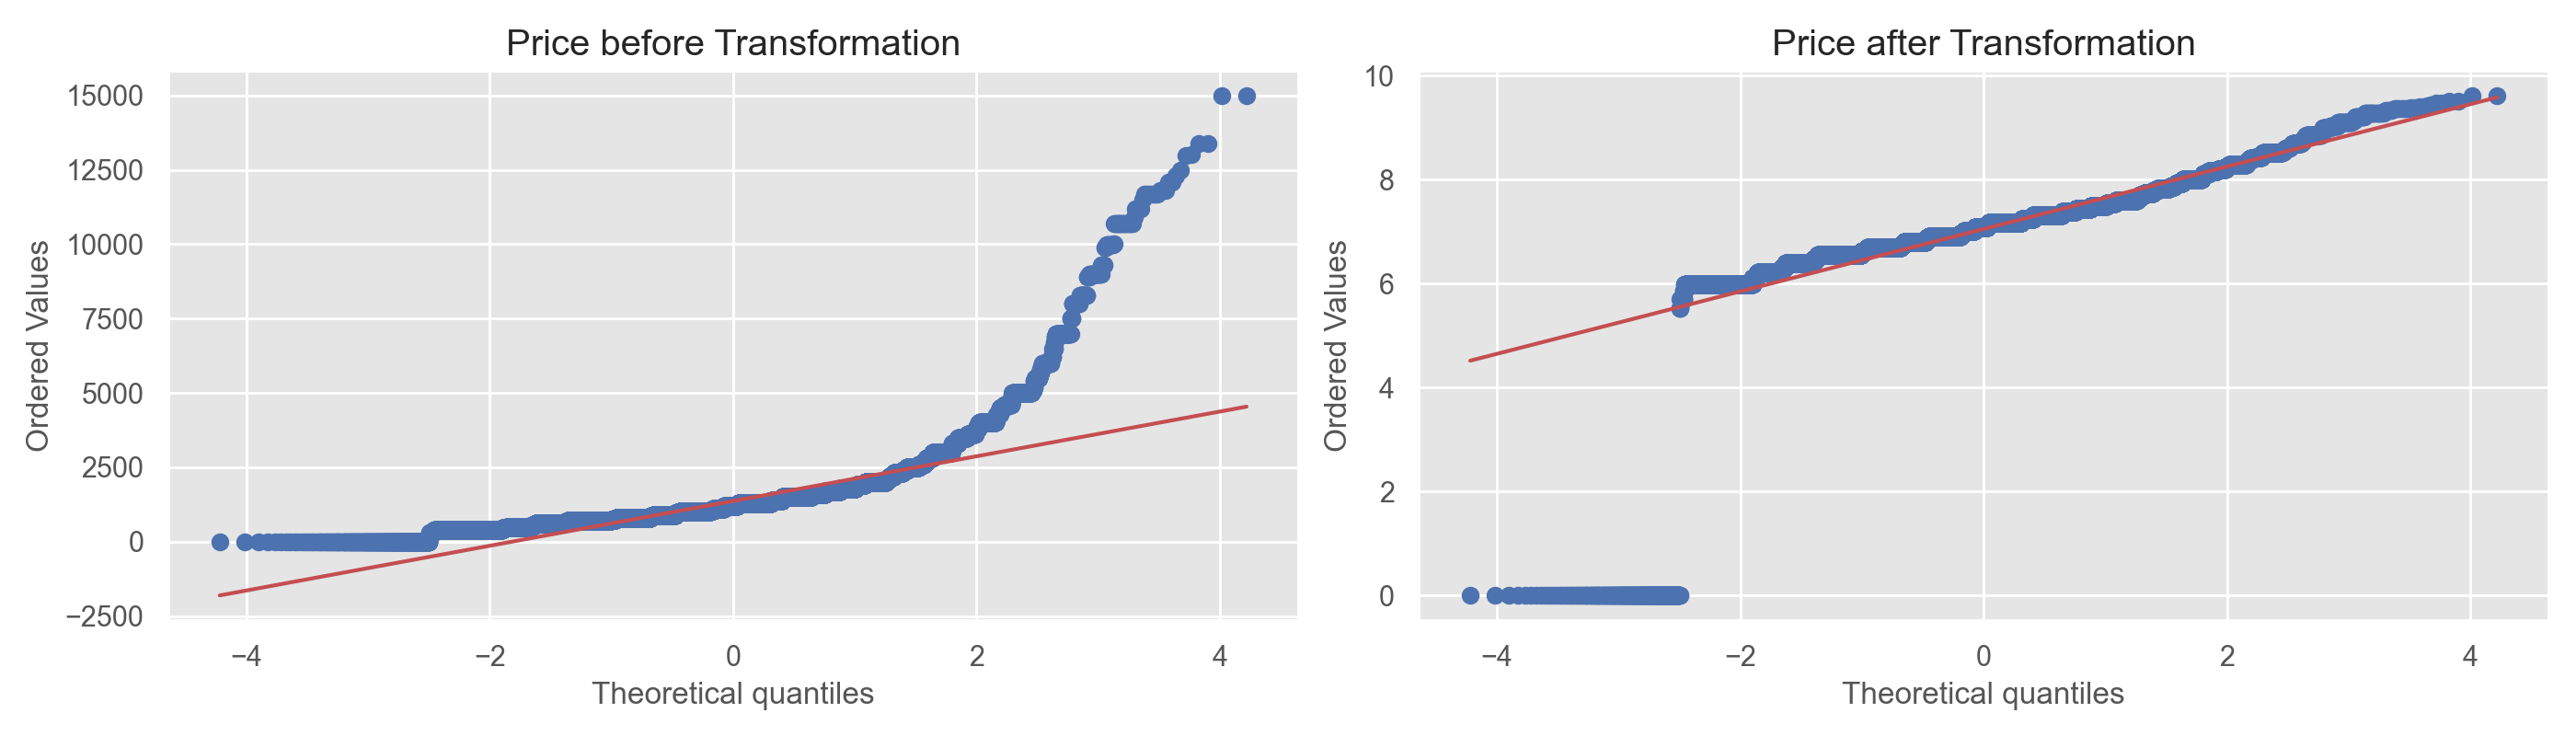

In [295]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(df['Price'], dist='norm', plot=plt)
plt.title('Price before Transformation')
plt.subplot(122)
stats.probplot(log_transformed_data_1, dist='norm', plot=plt)
plt.title('Price after Transformation')
plt.tight_layout()
plt.show()

# z_score

In [308]:
subset_df = df[['Title', 'Selling Price', 'Price']].copy()
filtered_df = subset_df[(subset_df['Selling Price'] < 1300.0) & (subset_df['Price'] > 1500.0)].copy()
filtered_df['Selling Price Z-Score'] = stats.zscore(filtered_df['Selling Price'])
filtered_df['Price Z-Score'] = stats.zscore(filtered_df['Price'])
brands_below_selling_price_threshold = filtered_df[filtered_df['Selling Price'] < 1300.0]['Title']
brands_above_price_threshold = filtered_df[filtered_df['Price'] > 1500.0]['Title']

In [310]:
print("Brands with Selling Price below 1300.0:")
print(brands_below_selling_price_threshold)

Brands with Selling Price below 1300.0:
234         Striped Polo Collar T-shirt
266          Rapid Dry Training T-shirt
333      Solid Slim Tipping Polo Tshirt
398         Slim Fit Solid Polo T-shirt
418         Slim Fit Solid Polo T-shirt
                      ...              
56176        Printed Round Neck T-shirt
56178       Printed Polo Collar T-shirt
56185        Printed Round Neck T-shirt
56188        India Striped Polo T-shirt
56194         Solid Polo Collar T-shirt
Name: Title, Length: 6737, dtype: object


In [311]:
print("Brands with Price above 1500.0:")
print(brands_above_price_threshold)

Brands with Price above 1500.0:
234         Striped Polo Collar T-shirt
266          Rapid Dry Training T-shirt
333      Solid Slim Tipping Polo Tshirt
398         Slim Fit Solid Polo T-shirt
418         Slim Fit Solid Polo T-shirt
                      ...              
56176        Printed Round Neck T-shirt
56178       Printed Polo Collar T-shirt
56185        Printed Round Neck T-shirt
56188        India Striped Polo T-shirt
56194         Solid Polo Collar T-shirt
Name: Title, Length: 6737, dtype: object


In [316]:
threshold_selling_price = 1300.0
threshold_price = 1500.0

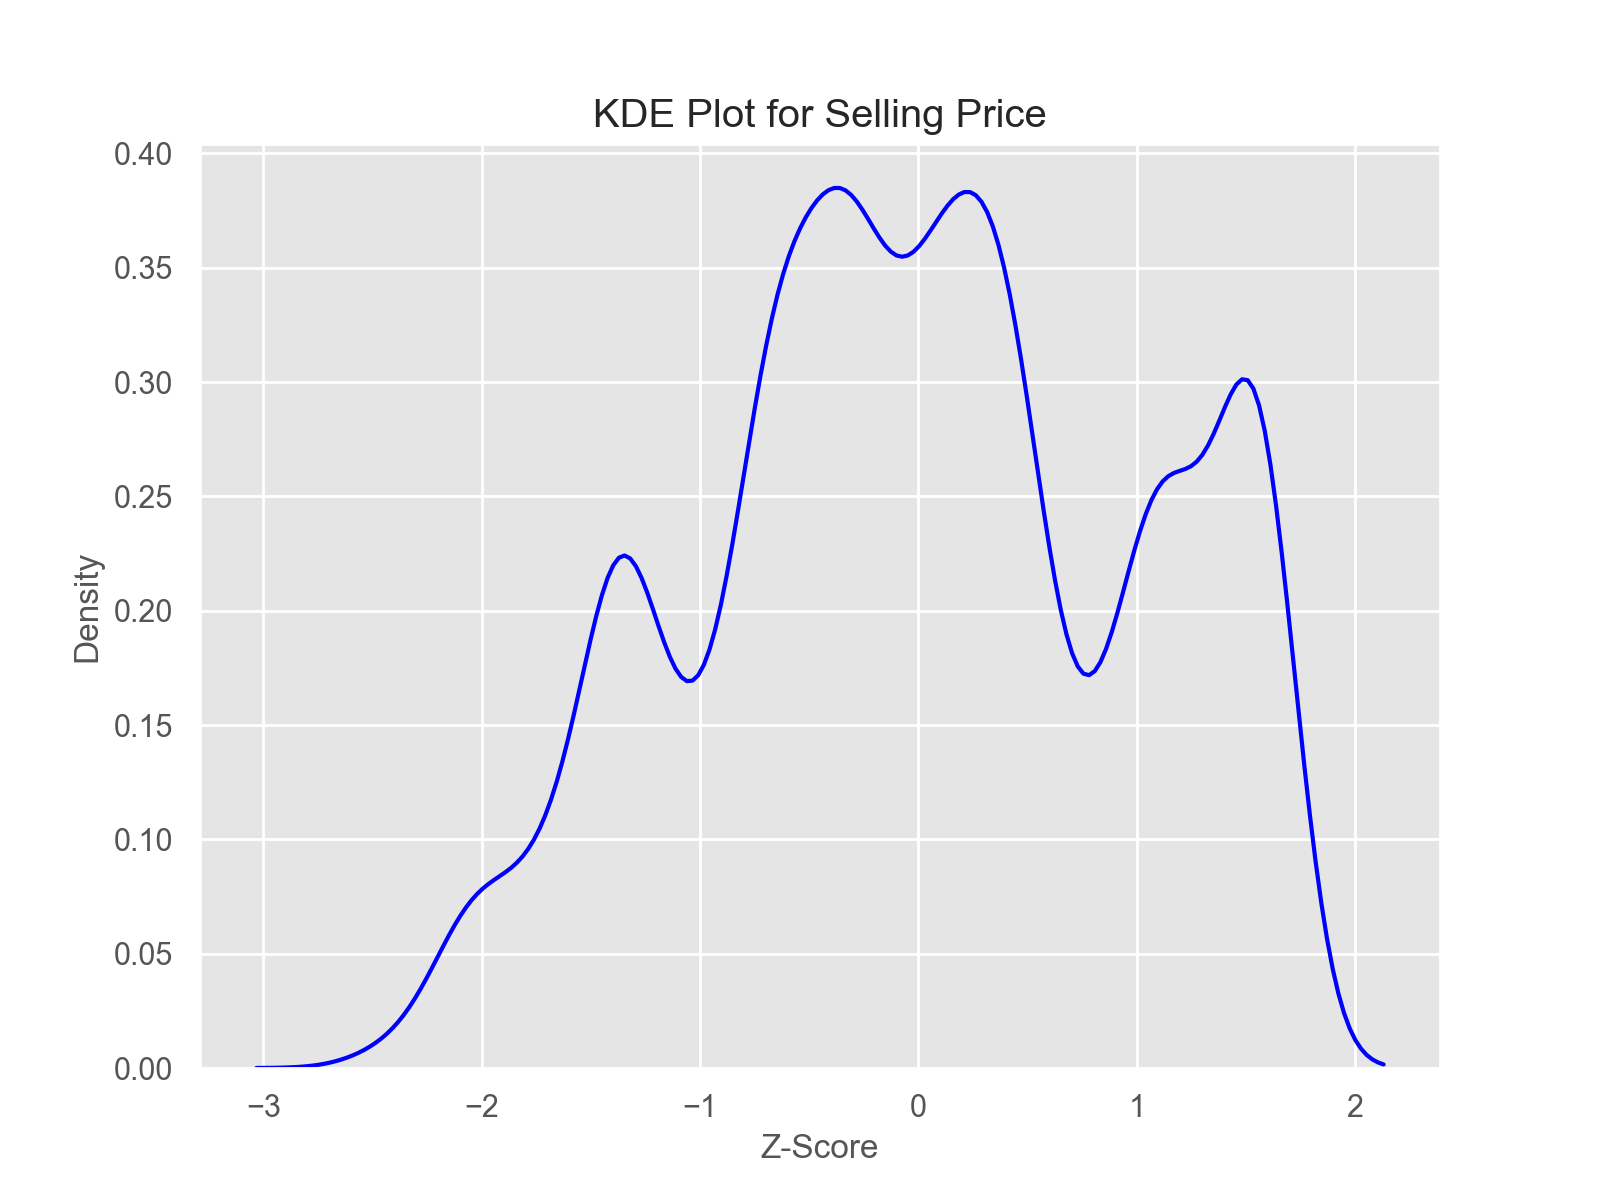

In [322]:
plt.figure(figsize=(8, 6))
sns.kdeplot(filtered_df['Selling Price Z-Score'], color='blue')
plt.title('KDE Plot for Selling Price')
plt.xlabel('Z-Score')
plt.ylabel('Density')

plt.show()

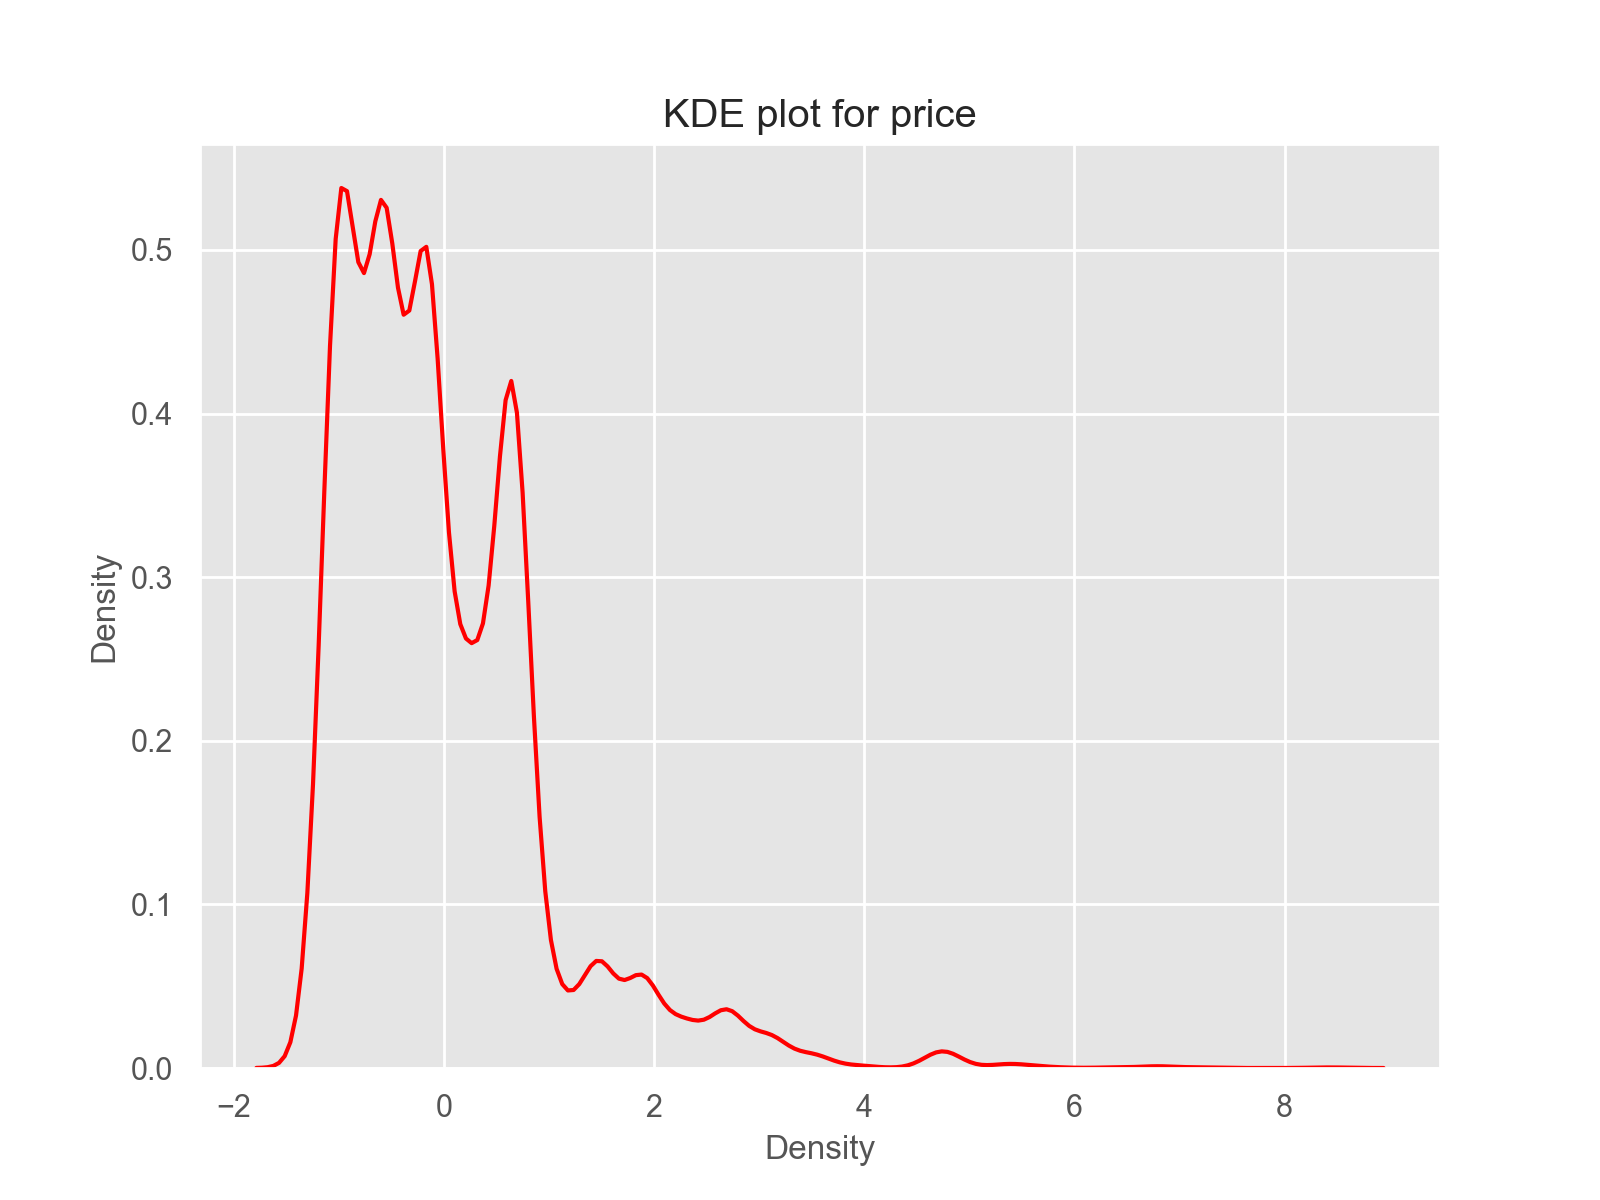

In [324]:
plt.figure(figsize=(8,6))
sns.kdeplot(filtered_df['Price Z-Score'],color='red')
plt.title('KDE plot for price')
plt.xlabel('z-score')
plt.xlabel('Density')
plt.show()

In [325]:
selling_price_mean = df['Selling Price'].mean()
selling_price_std = df['Selling Price'].std()

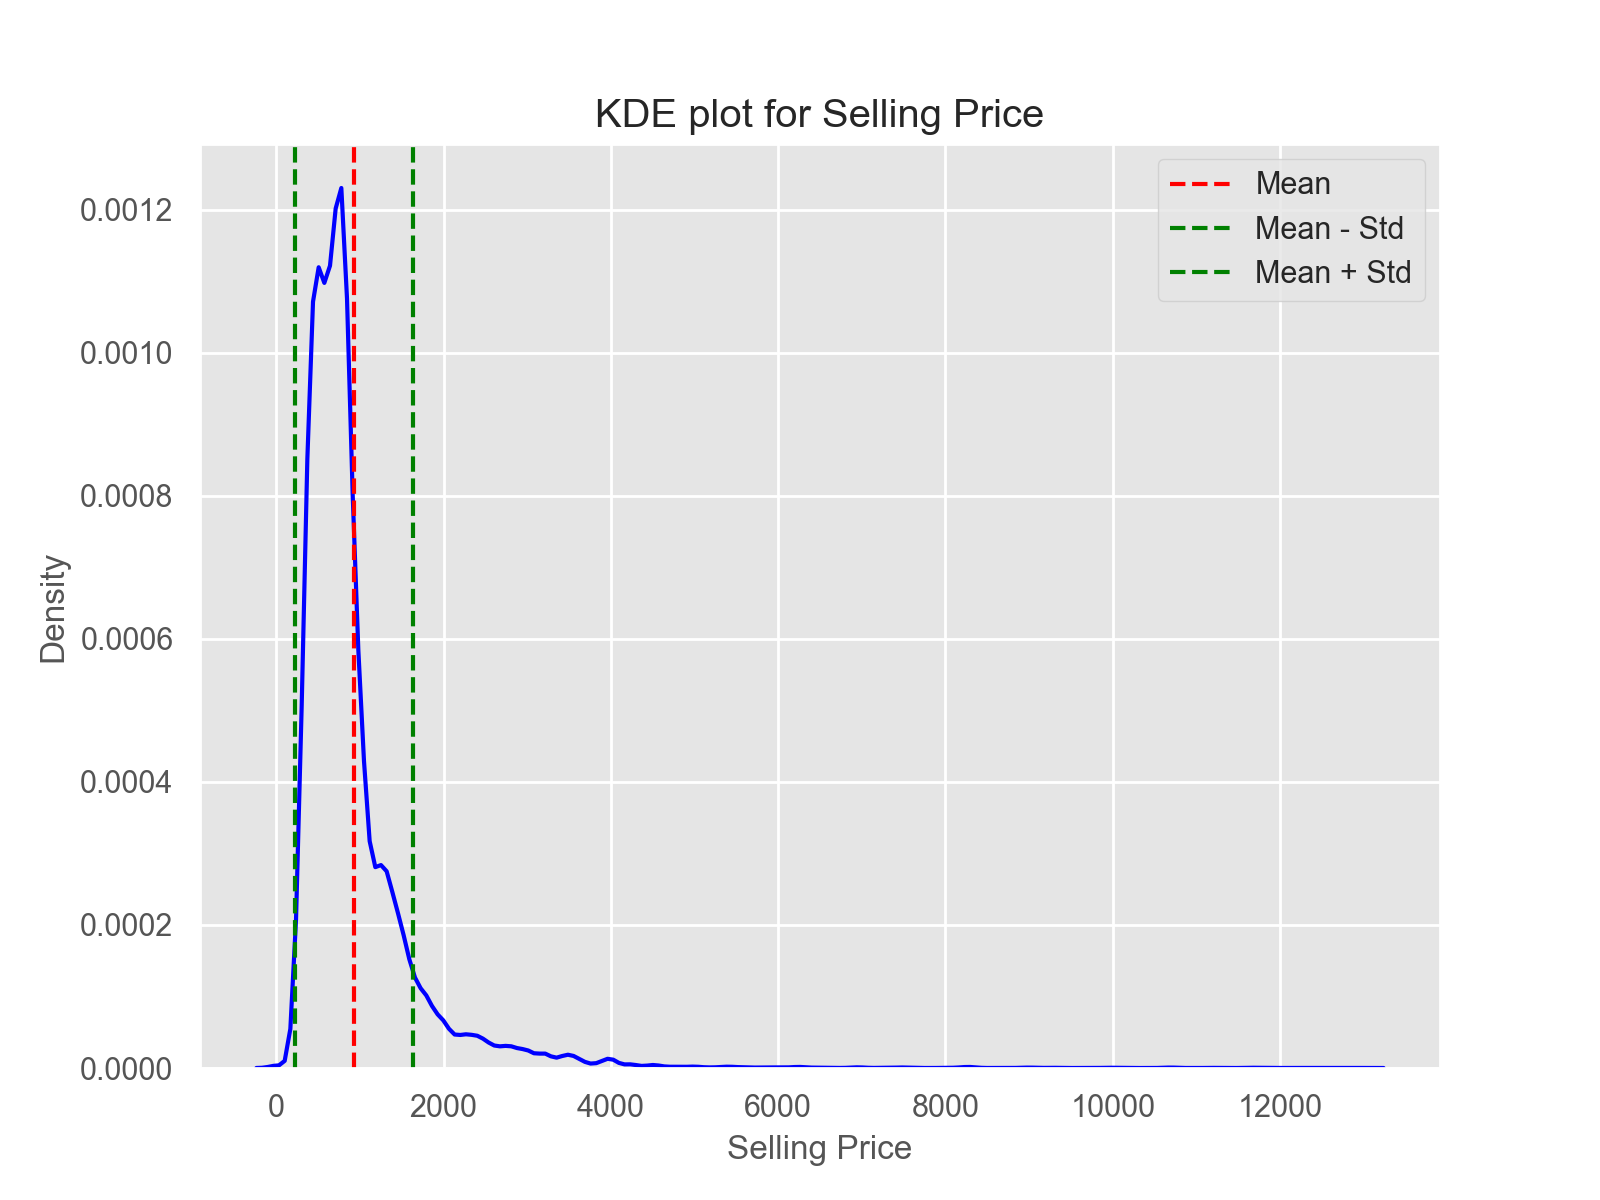

In [328]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Selling Price'], color='blue')
plt.axvline(x=selling_price_mean, color='red',linestyle='--',label='Mean')
plt.axvline(x=selling_price_mean- selling_price_std,color='green',linestyle='--',label='Mean - Std')
plt.axvline(x=selling_price_mean+ selling_price_std,color='green',linestyle='--',label='Mean + Std')
plt.title('KDE plot for Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

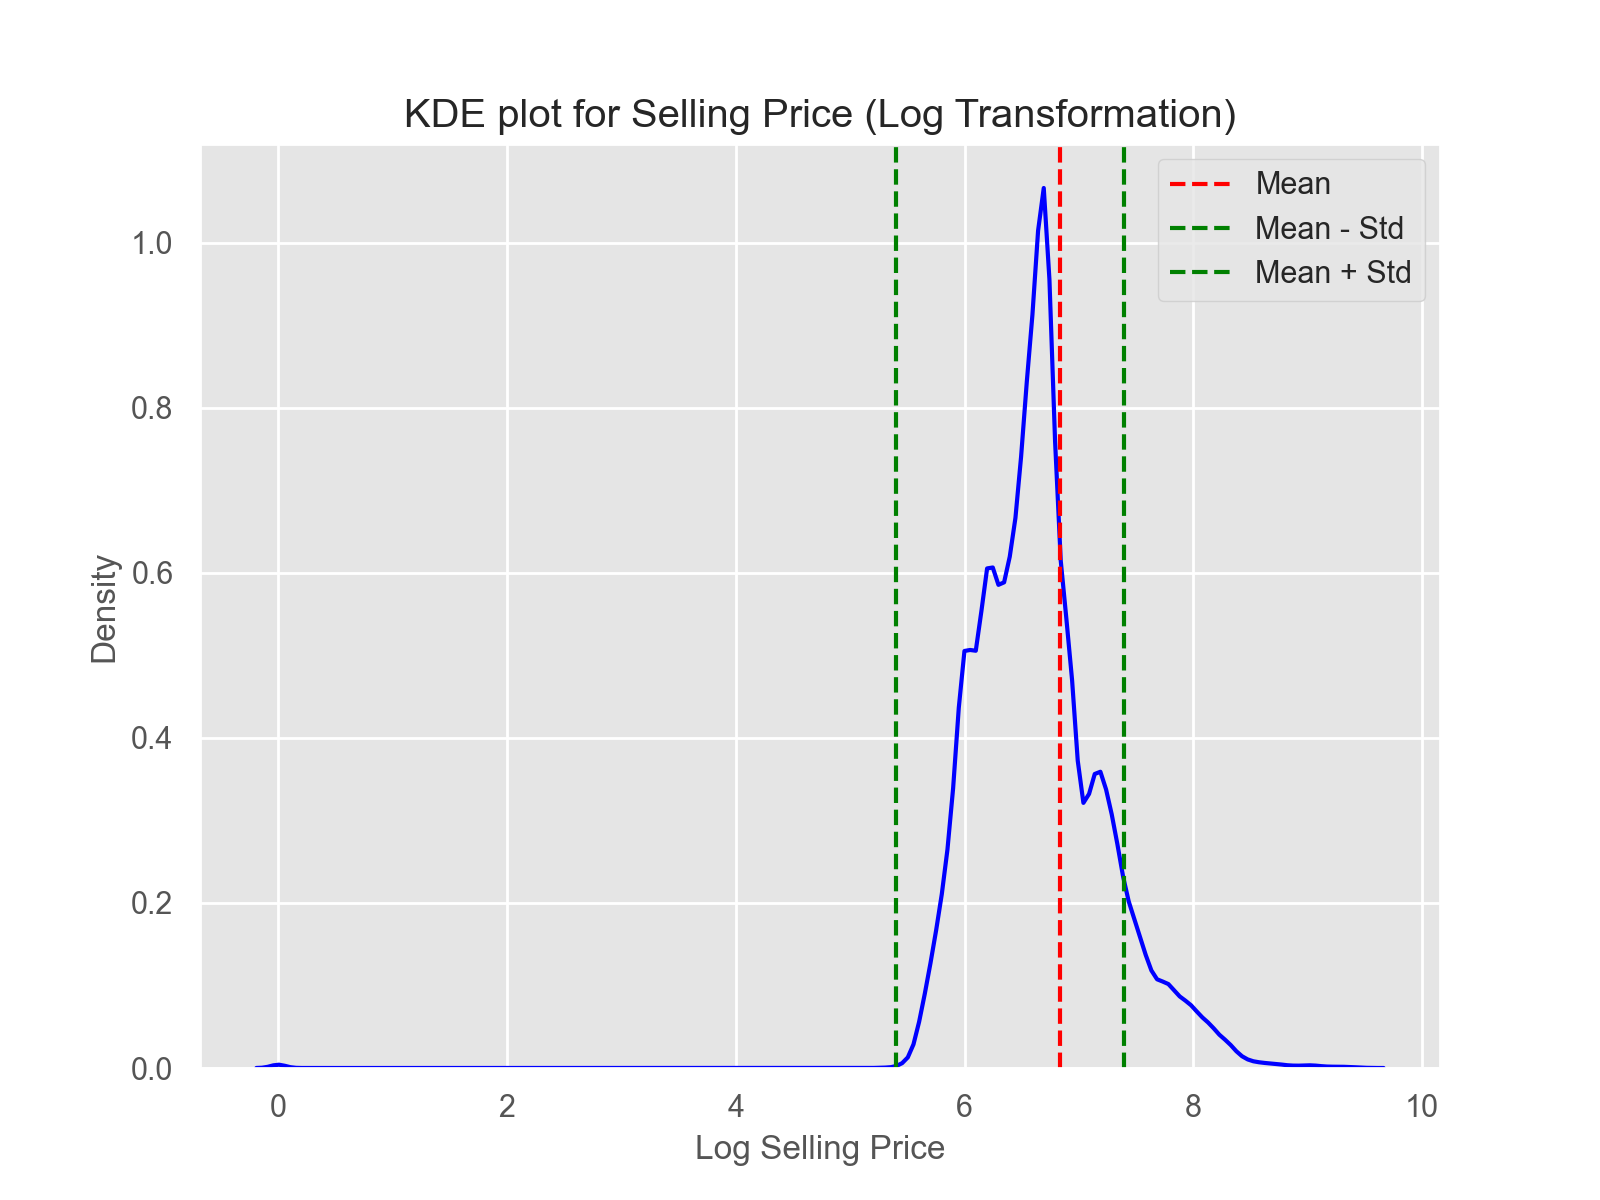

In [332]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.log1p(df['Selling Price']), color='blue')
plt.axvline(x=np.log1p(selling_price_mean), color='red', linestyle='--', label='Mean')
plt.axvline(x=np.log1p(selling_price_mean - selling_price_std), color='green', linestyle='--', label='Mean - Std')
plt.axvline(x=np.log1p(selling_price_mean + selling_price_std), color='green', linestyle='--', label='Mean + Std')
plt.title('KDE plot for Selling Price (Log Transformation)')
plt.xlabel('Log Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

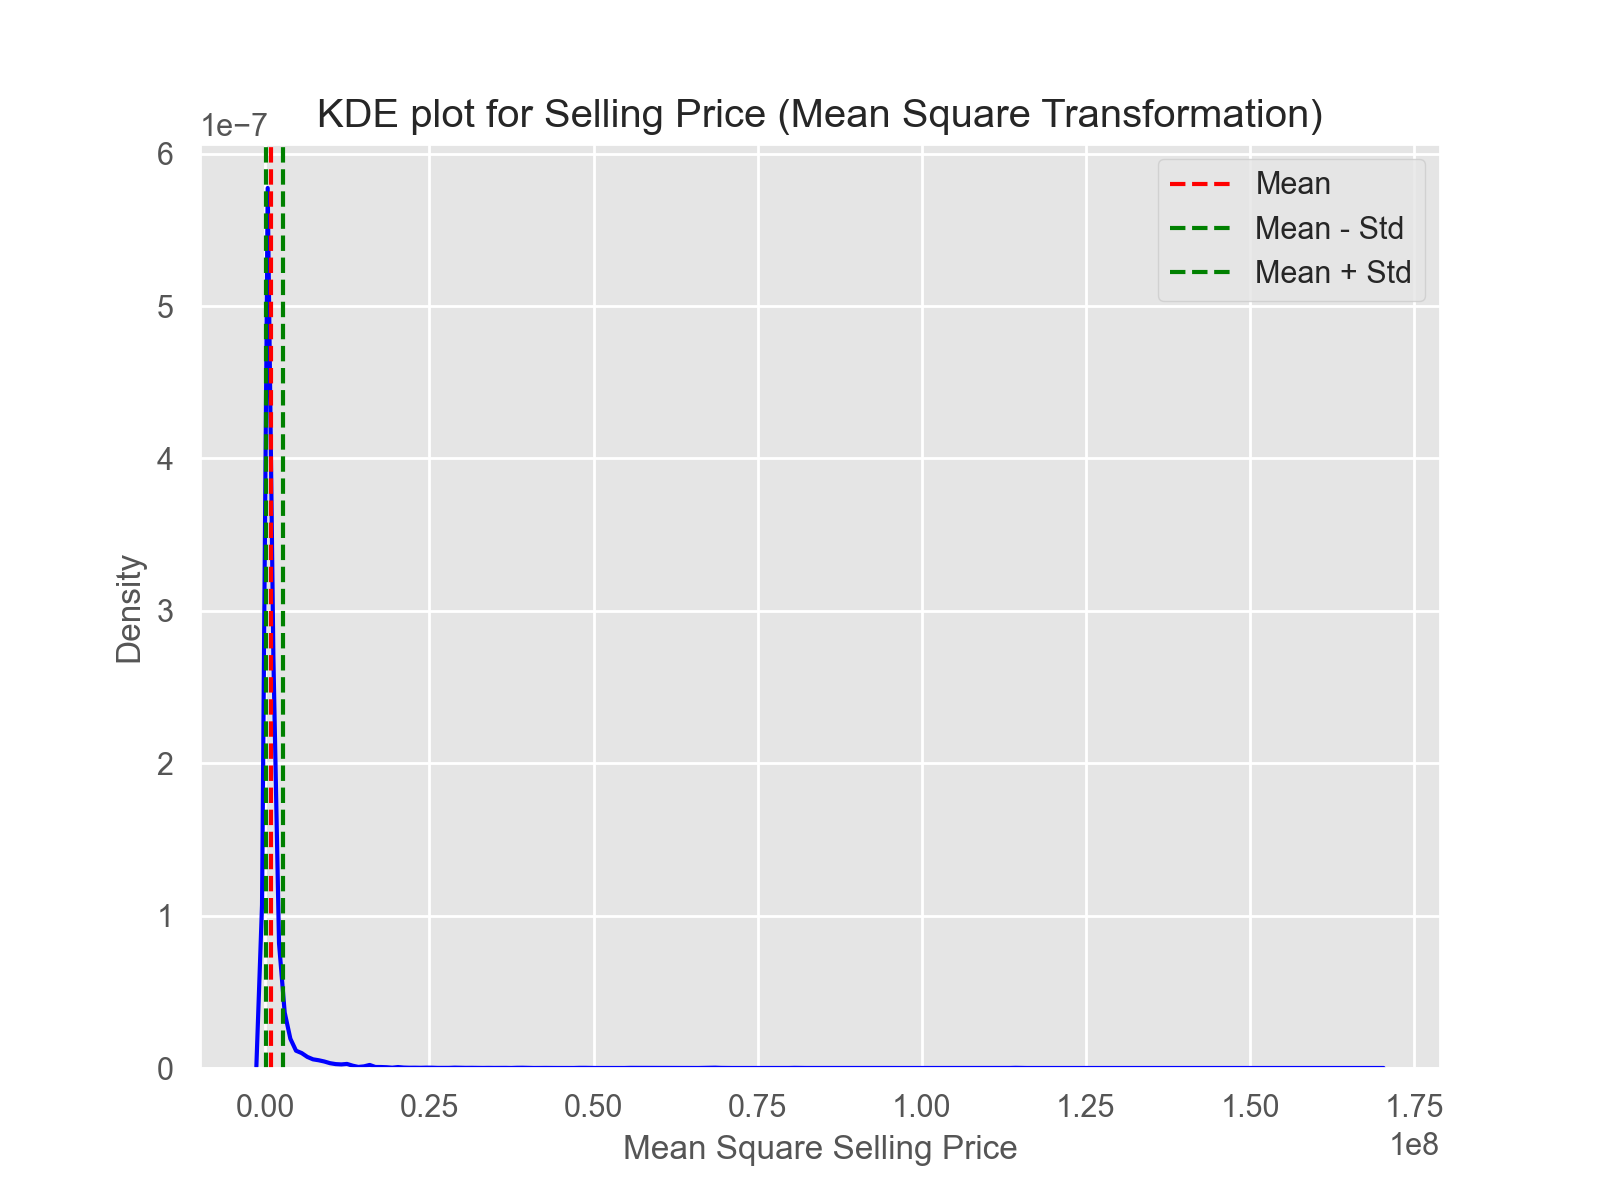

In [333]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.square(df['Selling Price']), color='blue')
plt.axvline(x=np.square(selling_price_mean), color='red', linestyle='--', label='Mean')
plt.axvline(x=np.square(selling_price_mean - selling_price_std), color='green', linestyle='--', label='Mean - Std')
plt.axvline(x=np.square(selling_price_mean + selling_price_std), color='green', linestyle='--', label='Mean + Std')
plt.title('KDE plot for Selling Price (Mean Square Transformation)')
plt.xlabel('Mean Square Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

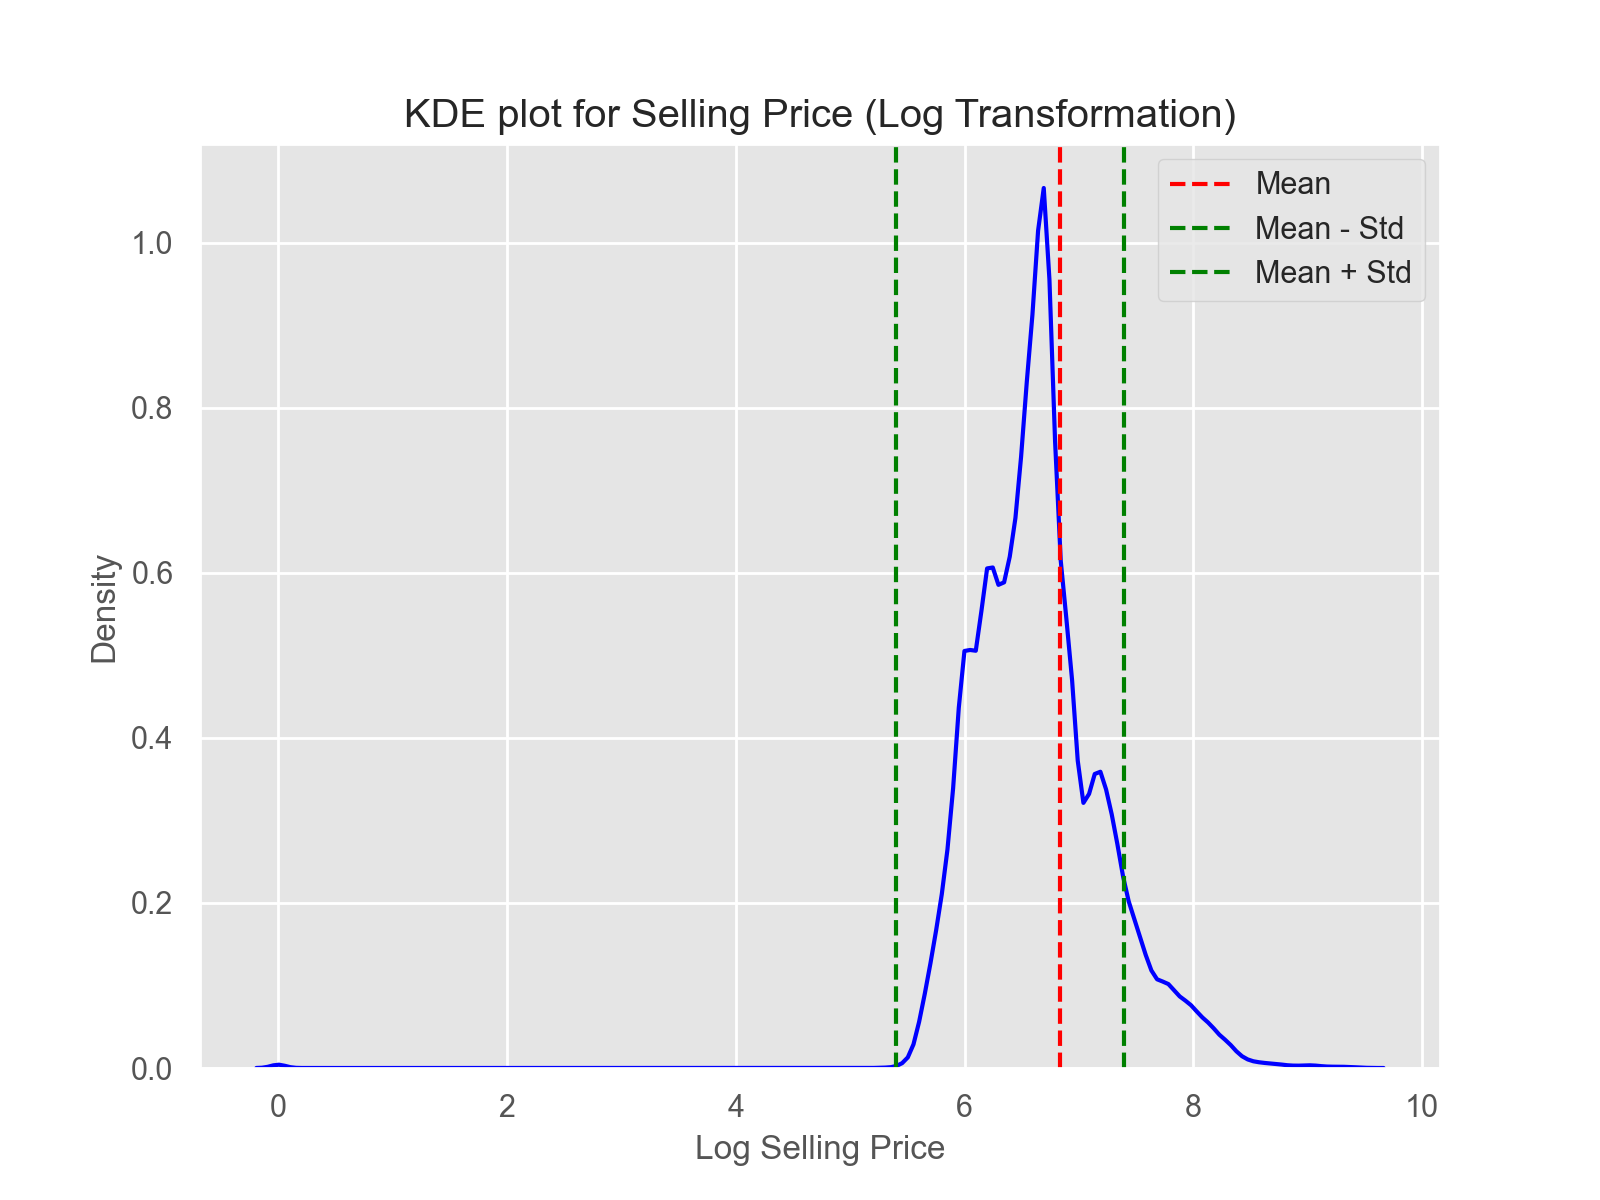

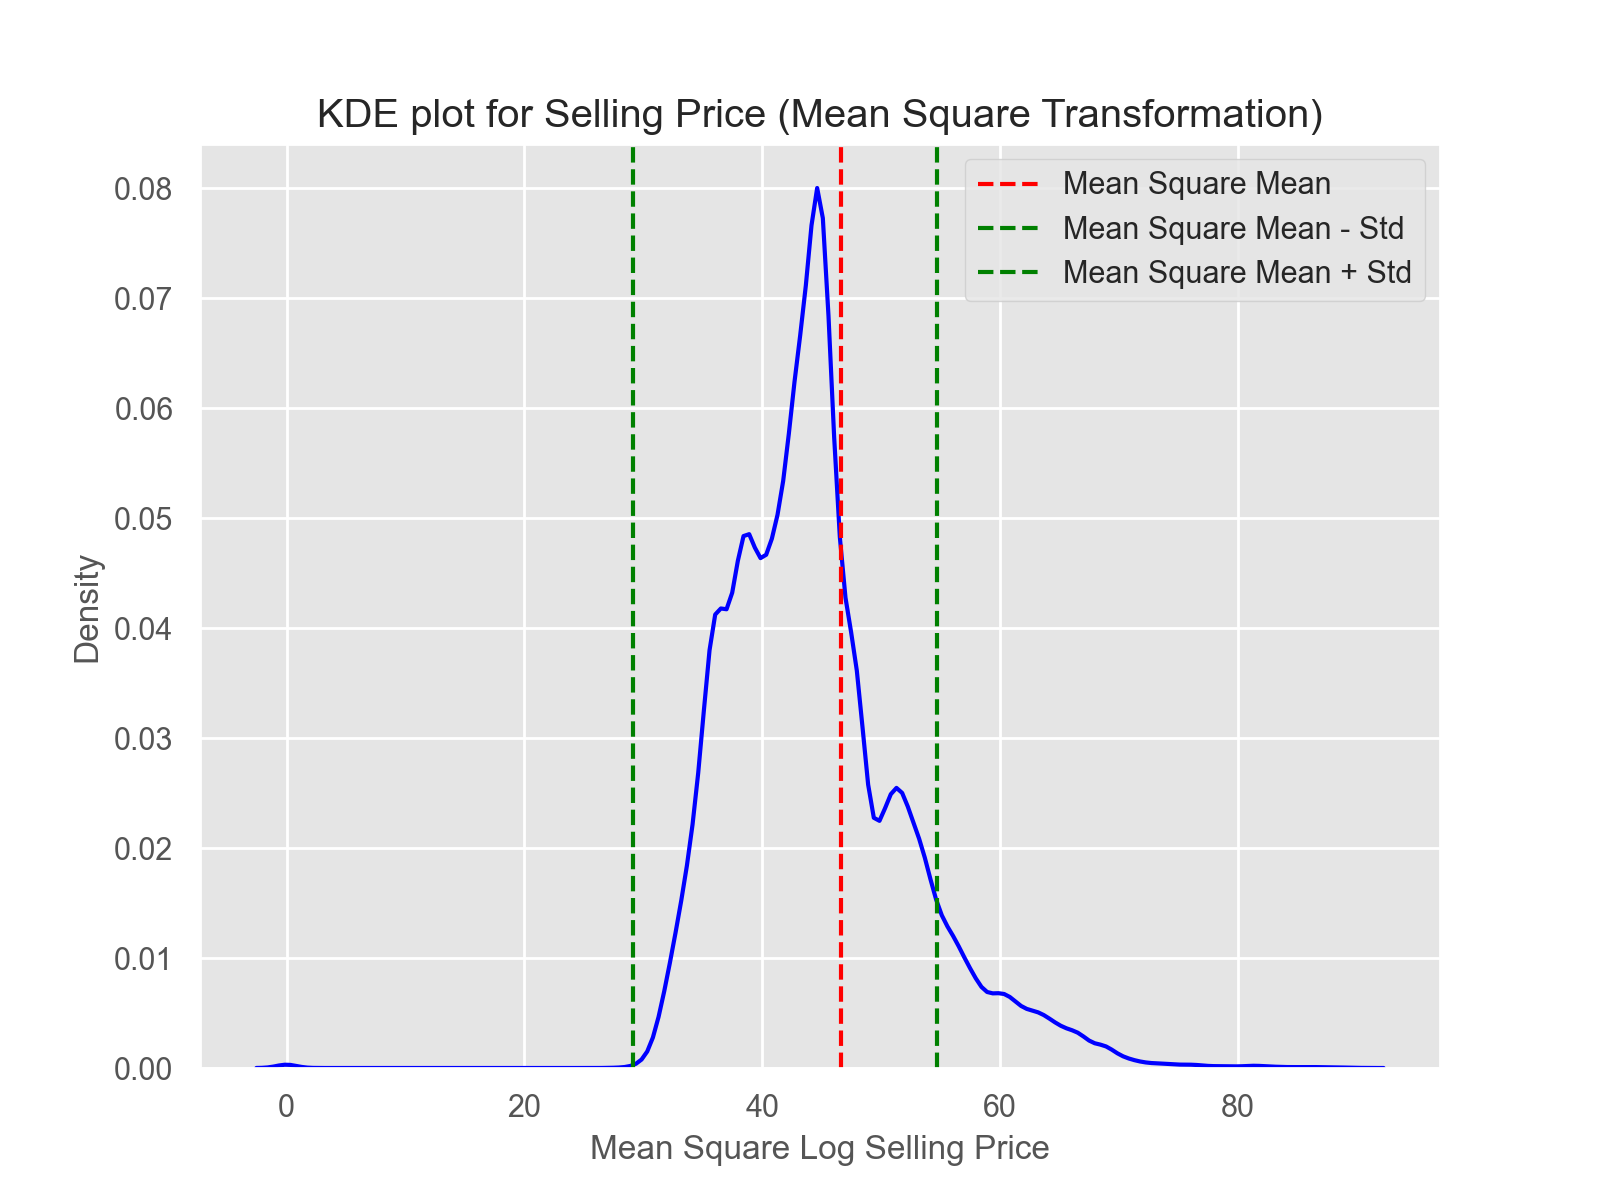

In [336]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.log1p(df['Selling Price']), color='blue')
plt.axvline(x=np.log1p(selling_price_mean), color='red', linestyle='--', label='Mean')
plt.axvline(x=np.log1p(selling_price_mean - selling_price_std), color='green', linestyle='--', label='Mean - Std')
plt.axvline(x=np.log1p(selling_price_mean + selling_price_std), color='green', linestyle='--', label='Mean + Std')
plt.title('KDE plot for Selling Price (Log Transformation)')
plt.xlabel('Log Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Apply mean square transformation
plt.figure(figsize=(8, 6))
sns.kdeplot(np.square(np.log1p(df['Selling Price'])), color='blue')
plt.axvline(x=np.square(np.log1p(selling_price_mean)), color='red', linestyle='--', label='Mean Square Mean')
plt.axvline(x=np.square(np.log1p(selling_price_mean - selling_price_std)), color='green', linestyle='--', 
            label='Mean Square Mean - Std')
plt.axvline(x=np.square(np.log1p(selling_price_mean + selling_price_std)), color='green', linestyle='--', 
            label='Mean Square Mean + Std')
plt.title('KDE plot for Selling Price (Mean Square Transformation)')
plt.xlabel('Mean Square Log Selling Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [342]:
shirt_prices = df['Selling Price'].sample(n=500, random_state=42).tolist()

In [344]:
print(shirt_prices)

[399.0, 539.0, 639.0, 749.0, 1291.0, 944.0, 1799.0, 569.0, 799.0, 699.0, 599.0, 499.0, 2699.0, 439.0, 1399.0, 836.0, 1349.0, 879.0, 749.0, 3824.0, 539.0, 494.0, 881.0, 3199.0, 824.0, 349.0, 714.0, 1342.0, 369.0, 824.0, 449.0, 503.0, 449.0, 369.0, 1199.0, 524.0, 879.0, 1899.0, 449.0, 519.0, 639.0, 395.0, 1359.0, 1439.0, 699.0, 399.0, 749.0, 879.0, 699.0, 359.0, 599.0, 399.0, 599.0, 974.0, 549.0, 494.0, 1105.0, 599.0, 399.0, 599.0, 799.0, 374.0, 909.0, 329.0, 719.0, 1299.0, 1299.0, 2379.0, 2999.0, 1889.0, 319.0, 1274.0, 899.0, 1549.0, 2209.0, 405.0, 734.0, 549.0, 649.0, 411.0, 786.0, 1297.0, 1319.0, 679.0, 699.0, 599.0, 2099.0, 639.0, 511.0, 899.0, 479.0, 799.0, 718.0, 406.0, 824.0, 714.0, 1499.0, 519.0, 1494.0, 1139.0, 799.0, 1199.0, 479.0, 599.0, 749.0, 699.0, 799.0, 884.0, 779.0, 2879.0, 539.0, 479.0, 759.0, 1019.0, 349.0, 599.0, 499.0, 629.0, 1763.0, 824.0, 1439.0, 3493.0, 299.0, 979.0, 335.0, 711.0, 769.0, 584.0, 949.0, 999.0, 2429.0, 949.0, 2699.0, 473.0, 329.0, 599.0, 779.0, 494.0

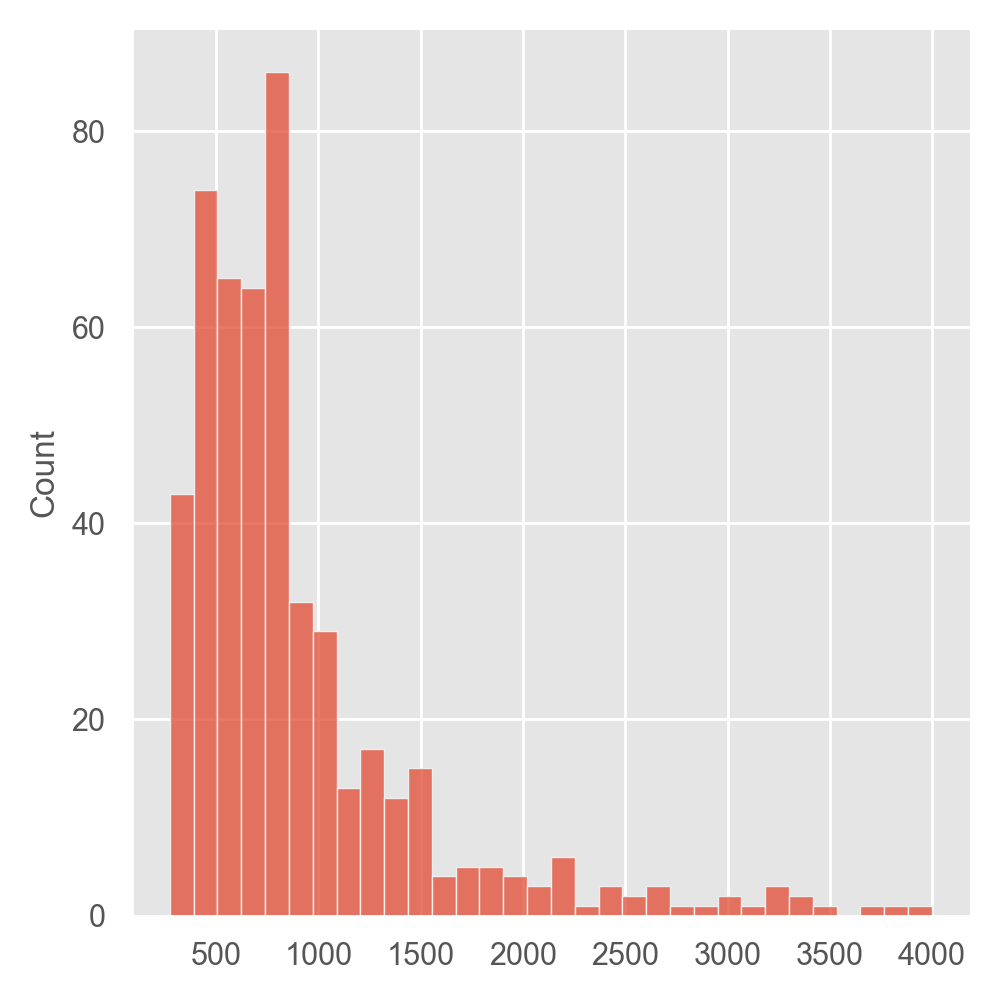

In [357]:
sns.displot(shirt_prices)

In [355]:
sample_size = 50
num_iterations = 1000 
sample_means = []
for _ in range(num_iterations):
    sample = np.random.choice(shirt_prices, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)


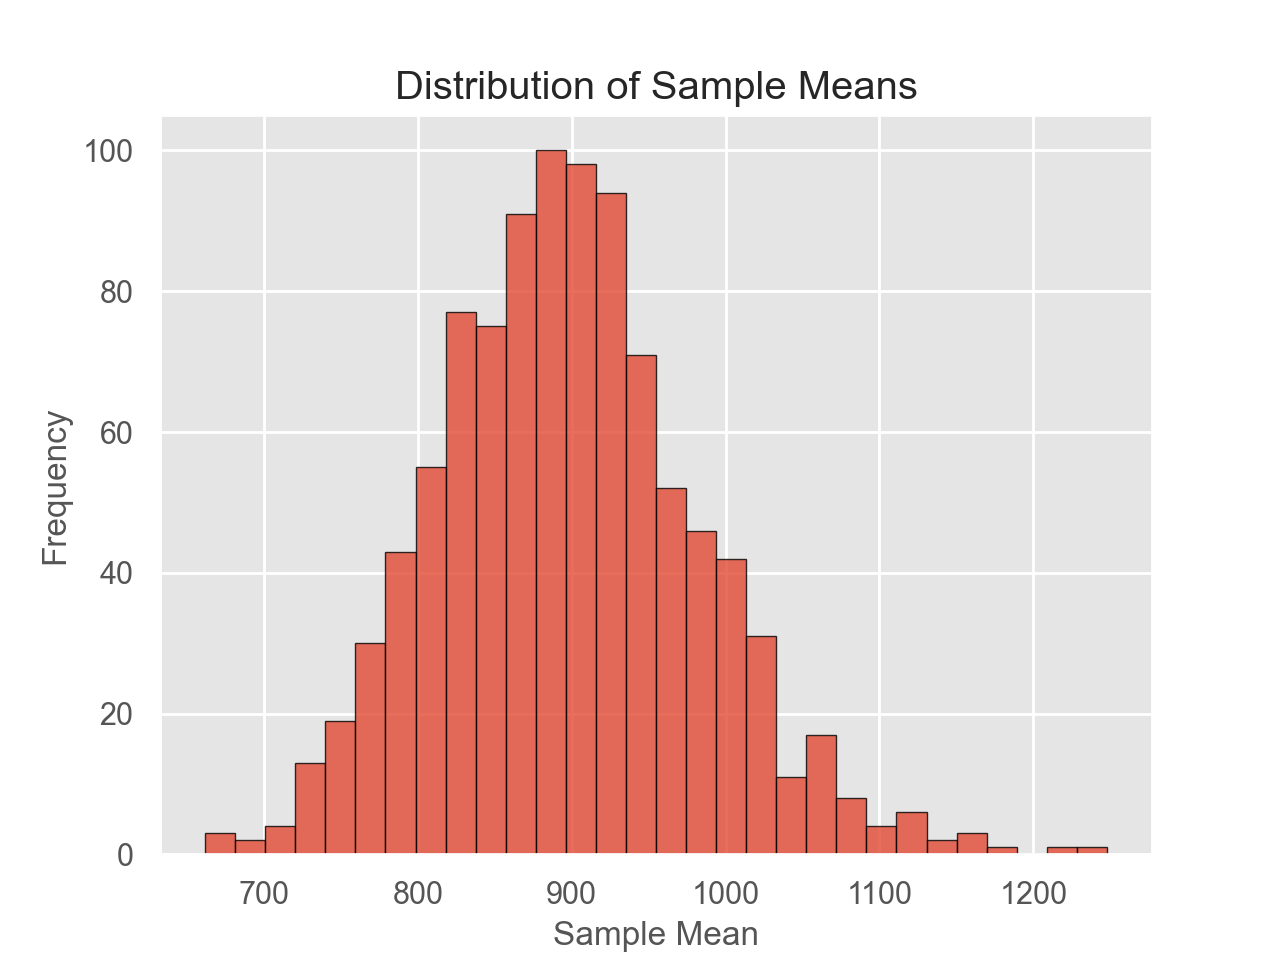

In [356]:
plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.8)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()